In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('Wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Data explorations

wine.Type.unique()


array([1, 2, 3], dtype=int64)

In [4]:
wine.Type.value_counts()


2    71
1    59
3    48
Name: Type, dtype: int64

In [5]:
# droping

wine['ID'] = range(1, 179, 1)
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [6]:
wine.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [8]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  ID               178 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 21.0 KB


In [9]:
# missing values 

wine.isnull().sum()


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

In [10]:
wine.skew()


Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

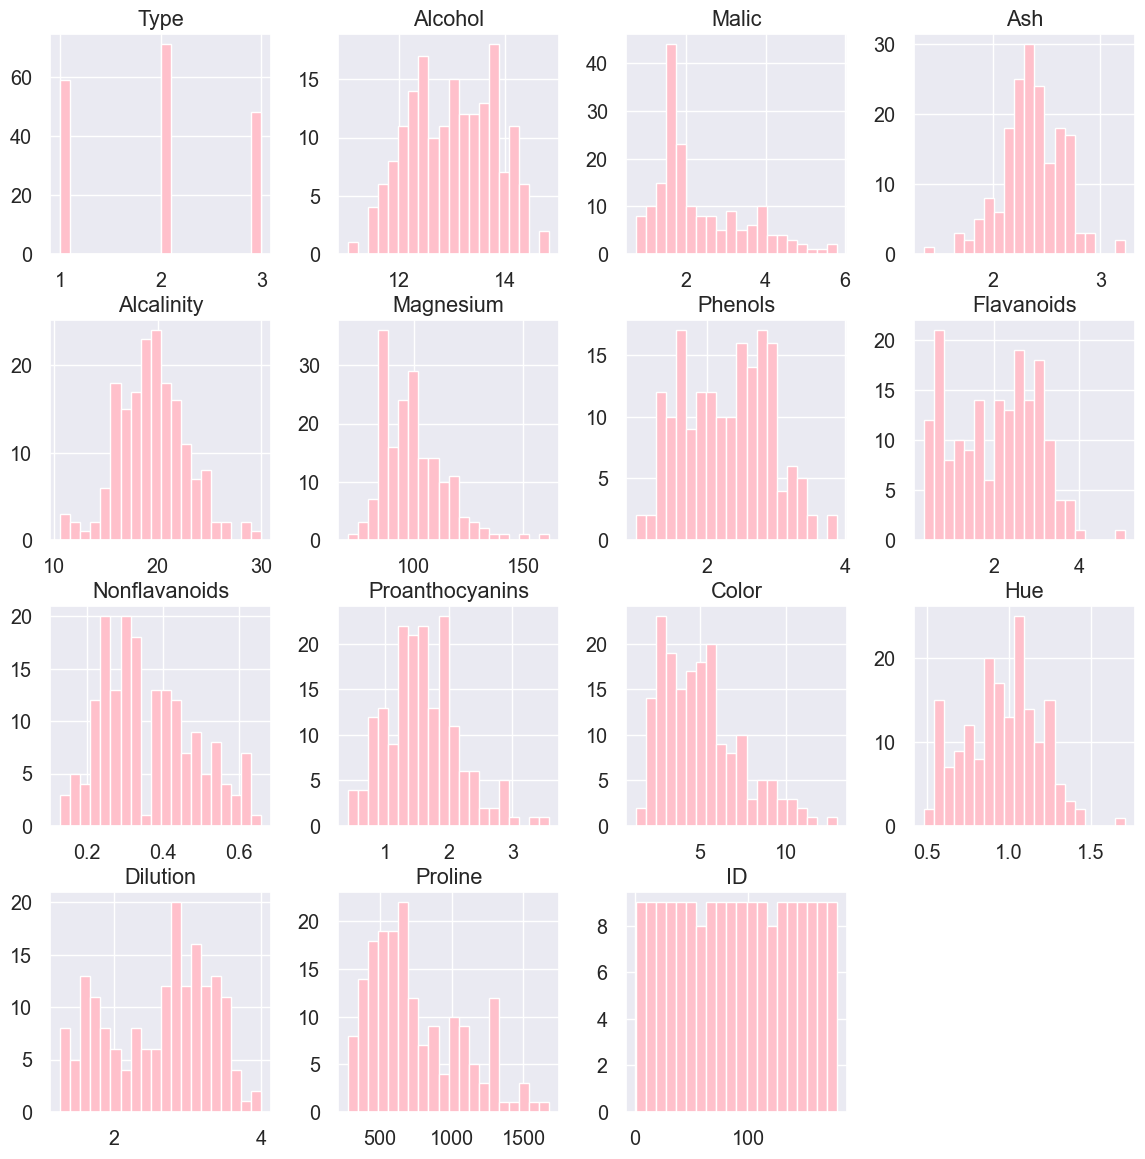

In [16]:
# Exploratory Data Analysis

sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = wine.hist(bins= 20, color= 'pink')

In [13]:
# outliers detection

wine.columns


Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

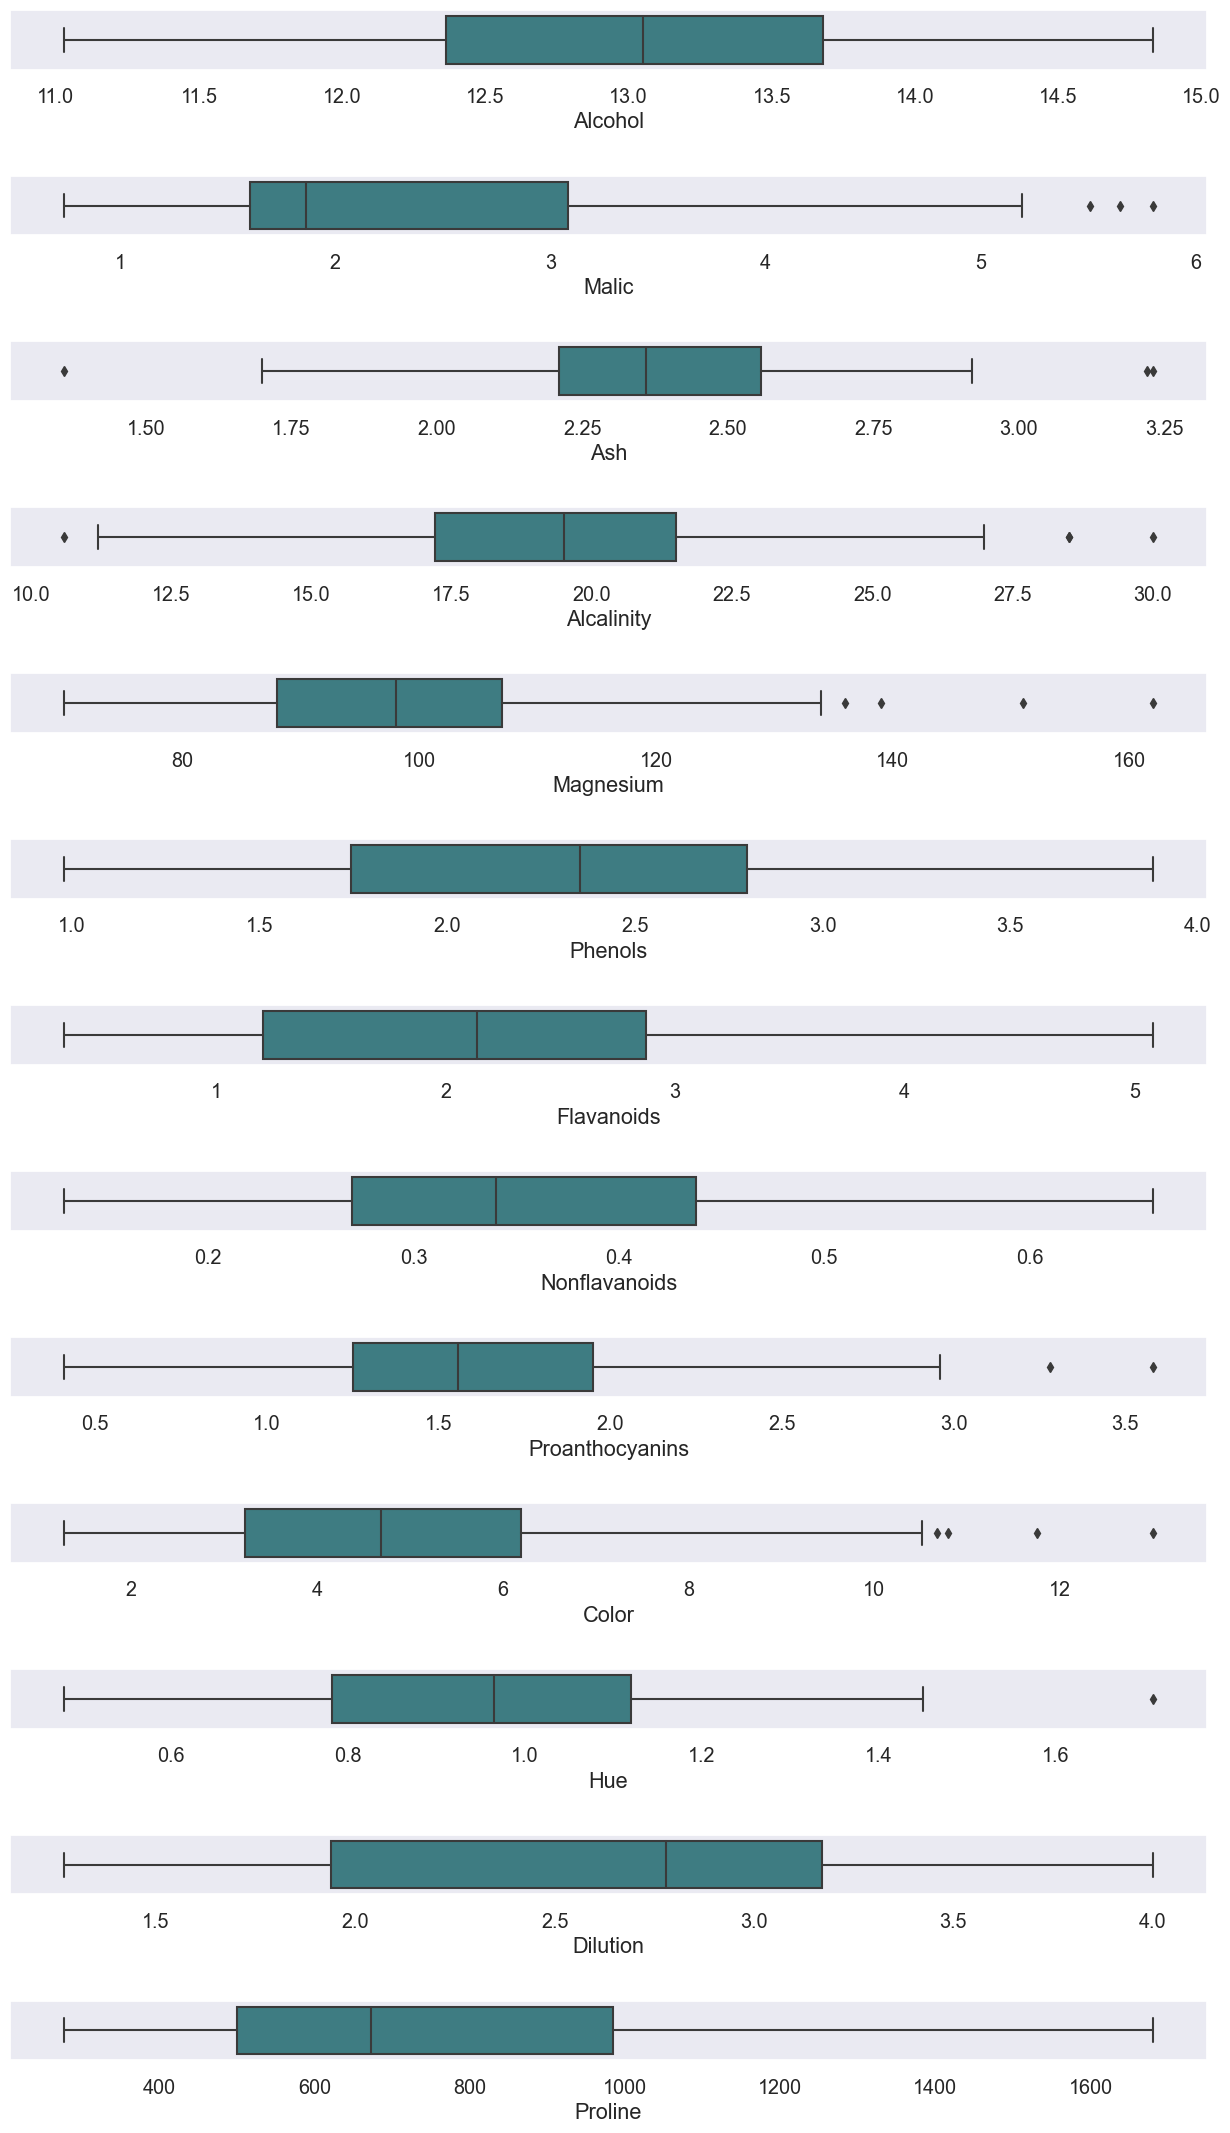

In [14]:
outlier = wine.copy() 
fig, axes=plt.subplots(13,1, figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outlier,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outlier,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outlier,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outlier,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)


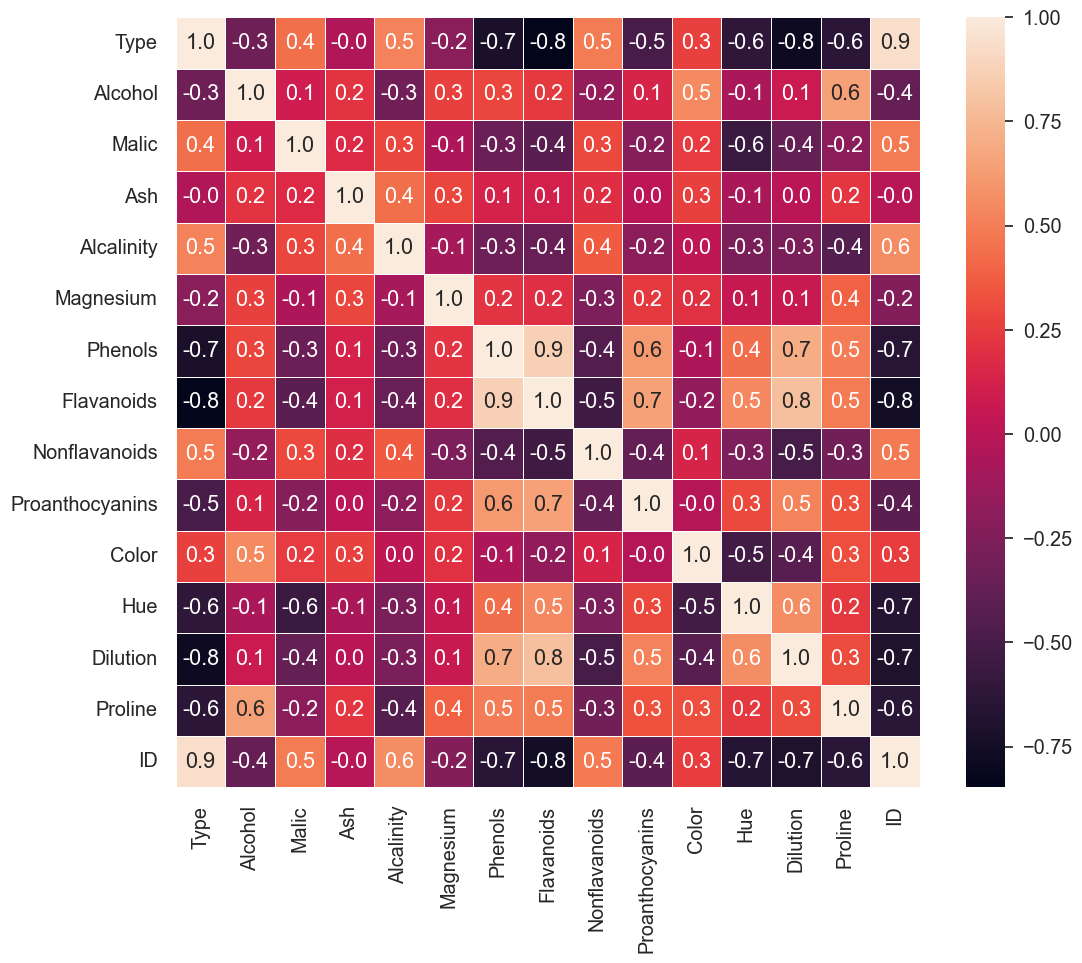

In [15]:
#Correlation Heatmap

f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(wine.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

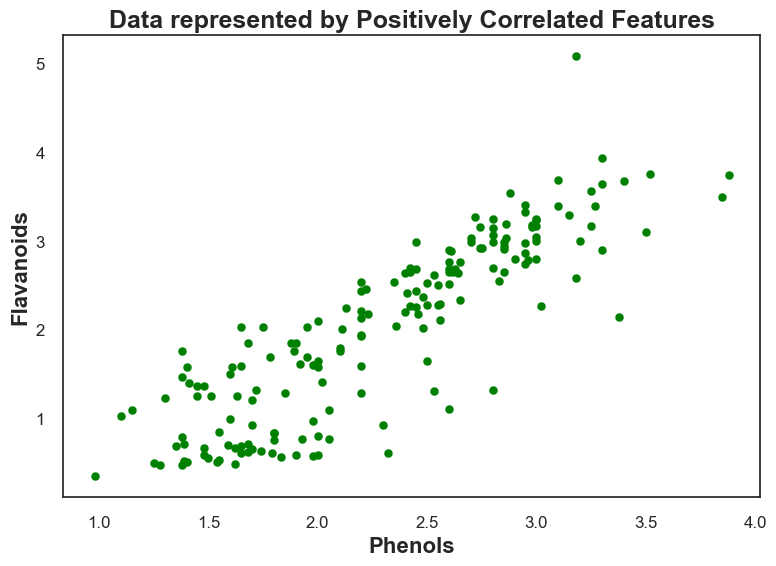

In [18]:
#Plotting frequent flying Phenols vs. Flavanoids
sns.set(style='white', rc= {'figure.figsize':(9,6)}, font_scale=1.1)

plt.scatter(x= wine['Phenols'], y= wine['Flavanoids'], color='green', lw=0.1)
plt.xlabel('Phenols',fontweight='bold', fontsize=16)
plt.ylabel('Flavanoids',fontweight='bold', fontsize=16)
plt.title('Data represented by Positively Correlated Features',fontweight='bold',fontsize= 18)
plt.show()


In [19]:
# Data Preprocessing

wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [20]:
wine_df = wine.set_index('ID')
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ID,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
#  Applying Standard Scaler on the Data
standard_scaler = StandardScaler()
std_wine = standard_scaler.fit_transform(wine)
std_wine.shape

(178, 15)

In [24]:
#Applying MinMax Scaler on Dataset
minmax = MinMaxScaler()

norm_wine = minmax.fit_transform(wine)
norm_wine.shape

(178, 15)

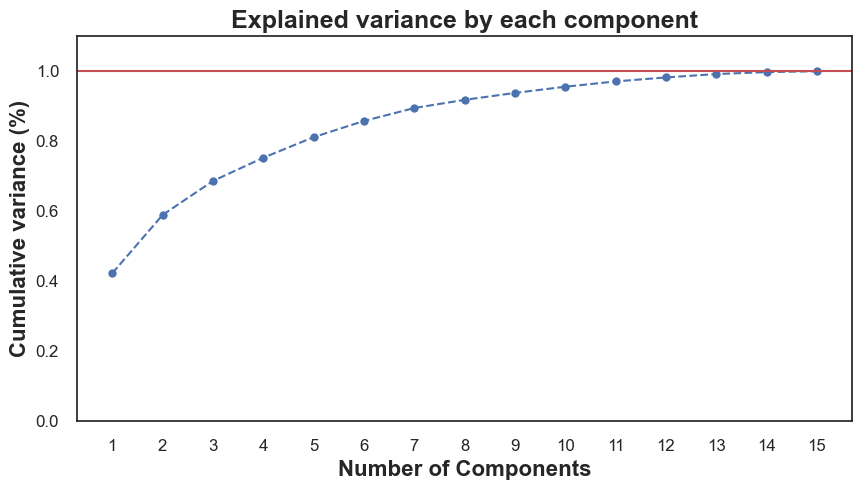

In [25]:
# PCA (Principal Component Analysis)
# PCA on Standard Scaled Dataset

pca_var = PCA()
pca_var.fit(std_wine)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1 + std_wine.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1+std_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [26]:
# The amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.42315618, 0.16647321, 0.09699353, 0.06632946, 0.05877432,
       0.04624981, 0.03695786, 0.0233517 , 0.01982763, 0.01765908,
       0.0151364 , 0.01143312, 0.00964268, 0.00560632, 0.0024087 ])

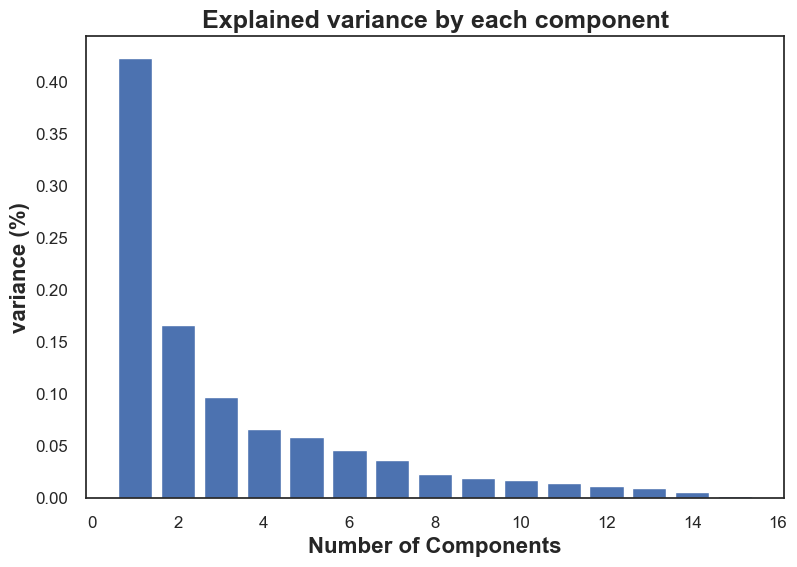

In [27]:
plt.bar(range(1, len(var) + 1), var)
plt.xlabel('Number of Components', fontweight='bold', fontsize=16)
plt.ylabel('variance (%)', fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

In [28]:
#Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 42.32,  58.97,  68.67,  75.3 ,  81.18,  85.8 ,  89.5 ,  91.84,
        93.82,  95.59,  97.1 ,  98.24,  99.2 ,  99.76, 100.  ])

In [29]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_wine)

# Convert to data frame
pca_std_wine = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_wine.shape)
pca_std_wine.head()

(178, 3)


,PC1,PC2,PC3
0,3.906276,-1.454982,-0.155368
1,3.005931,0.330906,-2.079463
2,3.187606,-1.038081,0.978714
3,4.245701,-2.771261,-0.126183
4,1.904549,-0.866149,1.917434


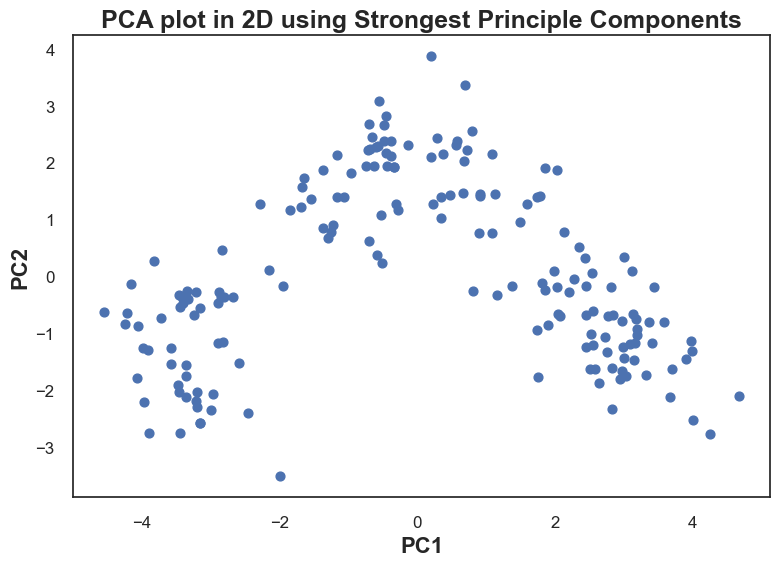

In [30]:
# PCA plot in 2D
plt.figure(figsize=(9,6))

# Scatterplot
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

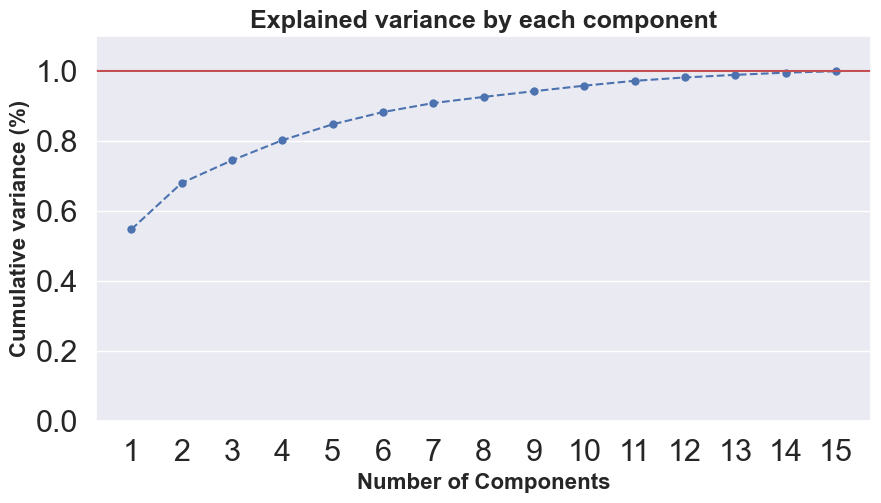

In [54]:
# PCA on MinMax Scaled Dataset
pca_var = PCA()
pca_var.fit(norm_wine)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1 + norm_wine.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1 + norm_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)


In [55]:
# The amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.54830941, 0.13241097, 0.06480939, 0.0574237 , 0.04538901,
       0.0350859 , 0.02569862, 0.01752812, 0.01631456, 0.01577557,
       0.01391124, 0.00958205, 0.00746694, 0.00626671, 0.00402782])

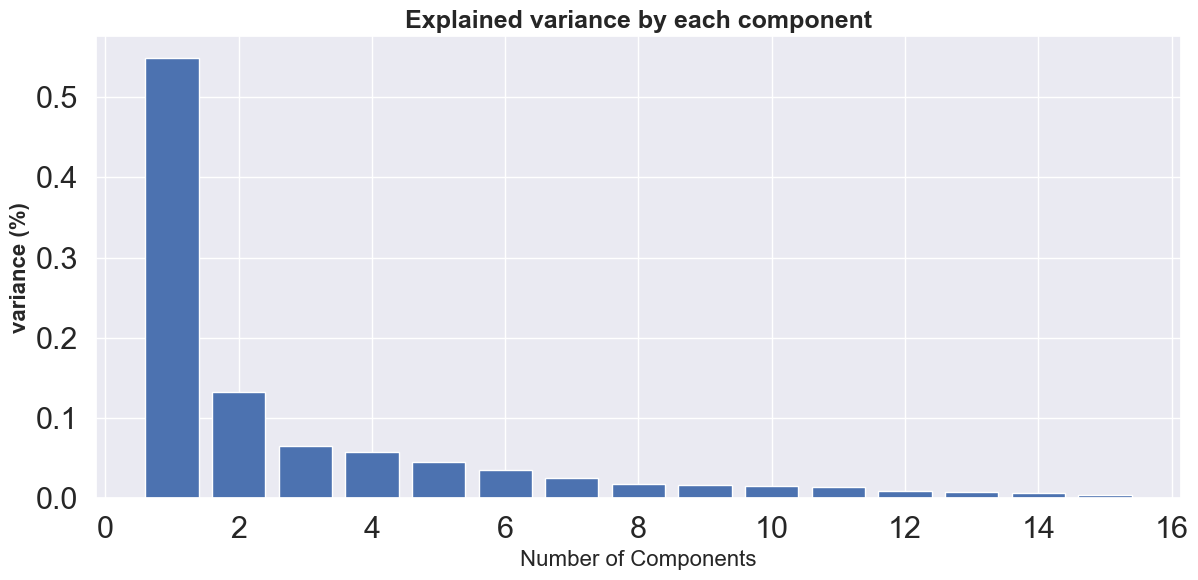

In [56]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

In [57]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 54.83,  68.07,  74.55,  80.29,  84.83,  88.34,  90.91,  92.66,
        94.29,  95.87,  97.26,  98.22,  98.97,  99.6 , 100.  ])

In [58]:
pca = PCA(n_components=3)
pca_norm = pca.fit_transform(norm_wine)

# Convert to data frame
pca_norm_wine = pd.DataFrame(data = pca_norm, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_norm_wine.shape)
pca_norm_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-0.979144,-0.241592,0.032566
1,-0.827752,-0.009548,-0.291197
2,-0.838919,-0.183929,0.127351
3,-1.050659,-0.561901,0.160457
4,-0.613267,-0.068768,0.051951


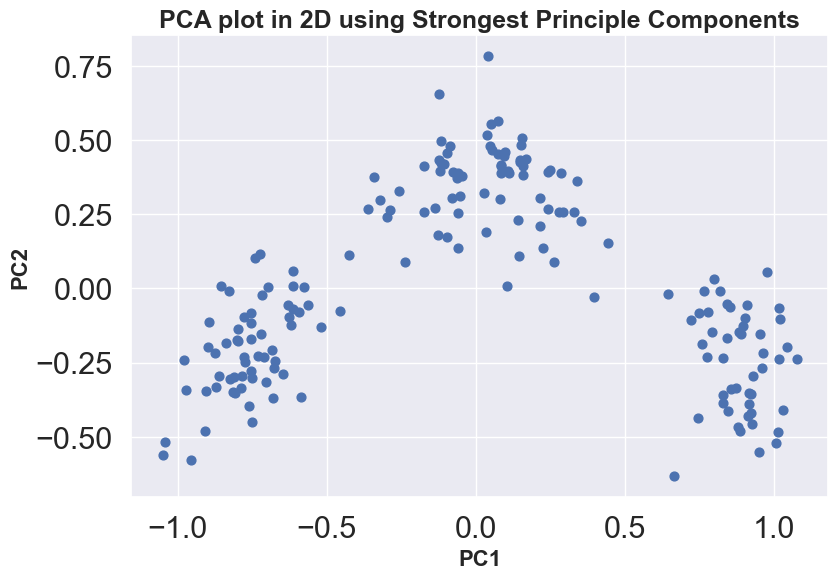

In [59]:
#PCA plot in 2D

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], s=40)

plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

In [31]:
# KMeans Clustering
# Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_wine)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.41it/s]


In [32]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_wine)
    silhouette[i] = sil(pca_std_wine, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.31it/s]


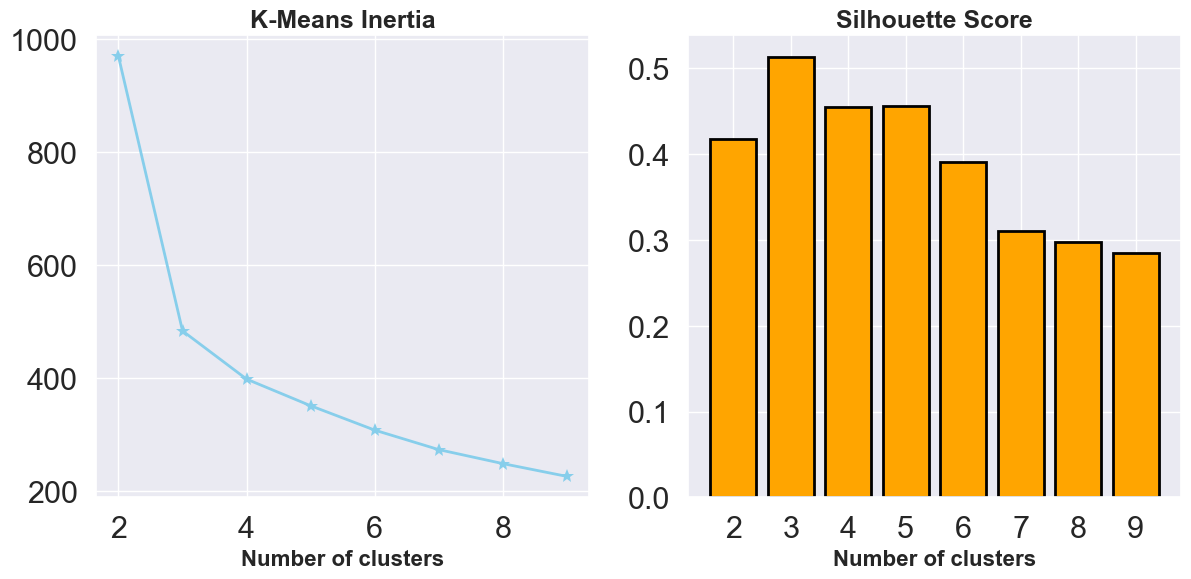

In [33]:
sns.set(style="darkgrid", rc={'figure.figsize':(14,6)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters", fontweight='bold', fontsize=16)
plt.title("K-Means Inertia", fontweight='bold', fontsize= 18)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', edgecolor="black", lw=2, color="orange" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters",fontweight='bold', fontsize=16)
plt.title("Silhouette Score", fontweight='bold', fontsize= 18)
plt.show()

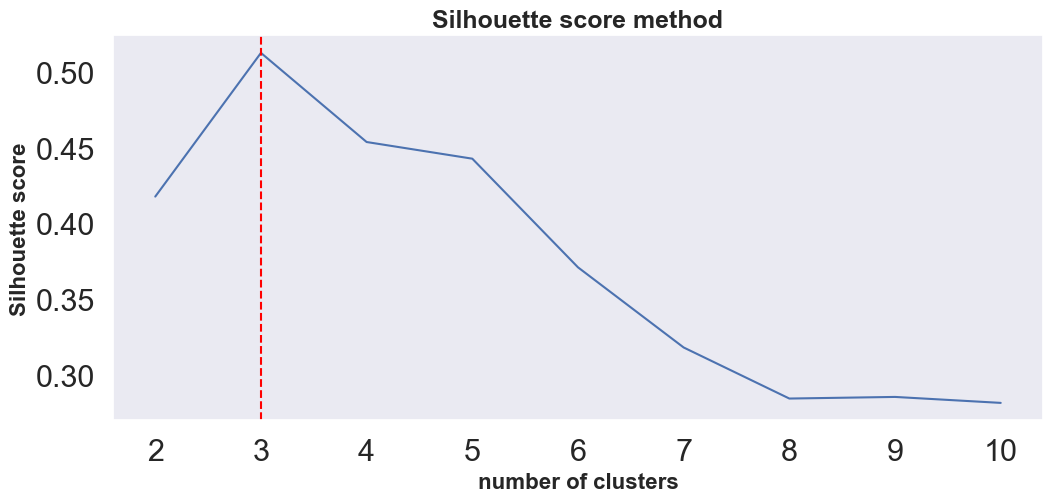

In [52]:
#Silhouette Score

from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_wine)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_std_wine, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
    
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = n_clusters, y = s_scores)
ax.set_title("Silhouette score method",fontweight='bold', fontsize=18)
ax.set_xlabel("number of clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


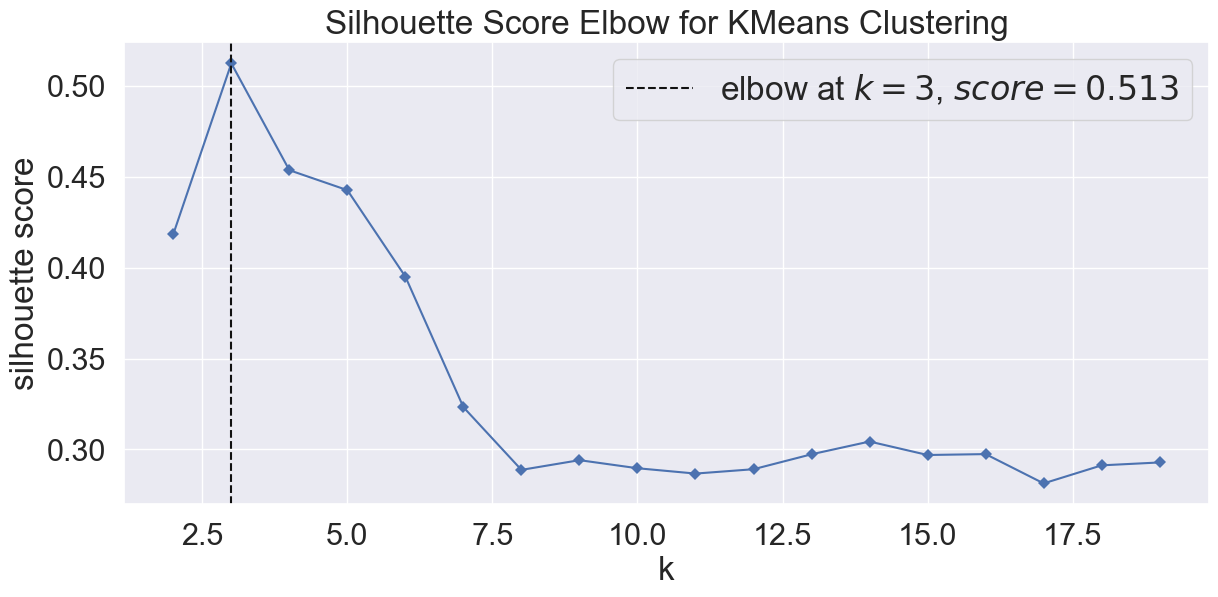

In [36]:
#Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_wine)    
visualizer.show()
plt.show()

In [40]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_wine)
    sil_score1 = sil(pca_std_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.41957663970720427
For n_clusters = 3 The average silhouette_score is : 0.5125042495290016
For n_clusters = 4 The average silhouette_score is : 0.4542527032612769
For n_clusters = 5 The average silhouette_score is : 0.4345808926931131
For n_clusters = 6 The average silhouette_score is : 0.39280711455381884
For n_clusters = 7 The average silhouette_score is : 0.3138711803927943
For n_clusters = 8 The average silhouette_score is : 0.2895707510299355
For n_clusters = 9 The average silhouette_score is : 0.2758267193750111


In [41]:
# Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_wine)
y_predict_kmeans.shape

(178,)

In [42]:
y_predict_kmeans


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [43]:
model_kmeans.labels_


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [44]:
model_kmeans.cluster_centers_


array([[-0.14108709,  1.72051631,  0.21637408],
       [-3.30102796, -1.20591448, -0.19696529],
       [ 2.80892282, -0.94926721, -0.08298588]])

In [45]:
model_kmeans.inertia_


483.6727156564361

In [46]:
#Assign clusters to the data set

wine_df['Kmeans_Label'] = model_kmeans.labels_

In [47]:
# Group data by Clusters (K=6)
wine_df.groupby('Kmeans_Label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235
1,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
2,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


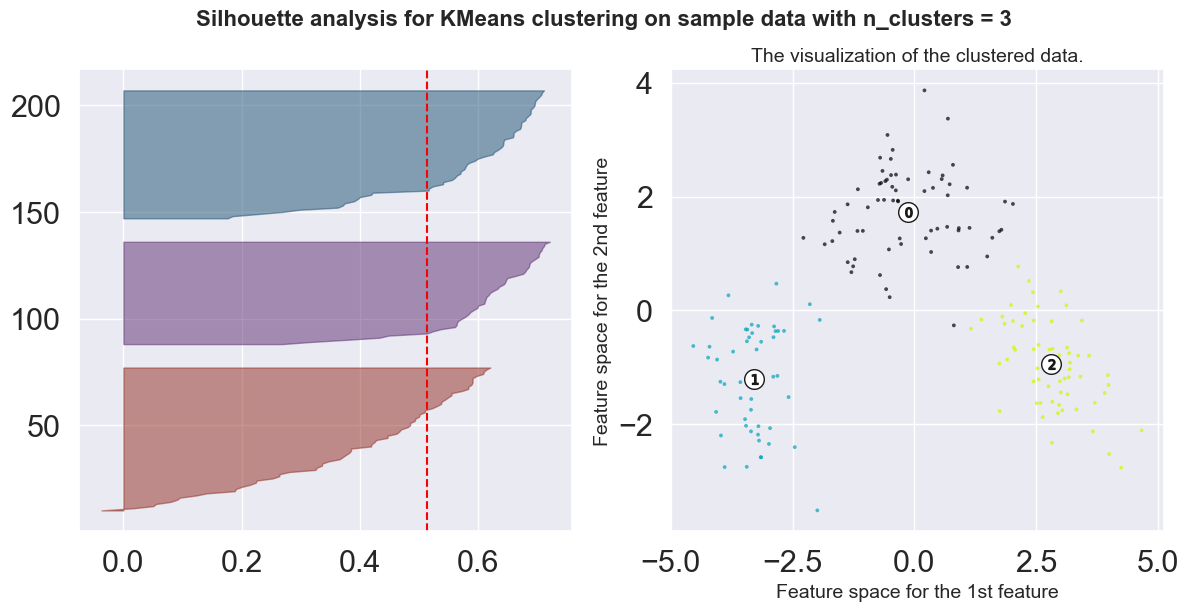

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 3 is number of clusters
ax2.scatter(pca_std_wine.iloc[:, 0], pca_std_wine.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3),fontsize=16, fontweight='bold')

plt.show()

In [60]:
# Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_norm_wine)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.09it/s]


In [61]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_norm_wine)
    silhouette[i] = sil(pca_norm_wine, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.96it/s]


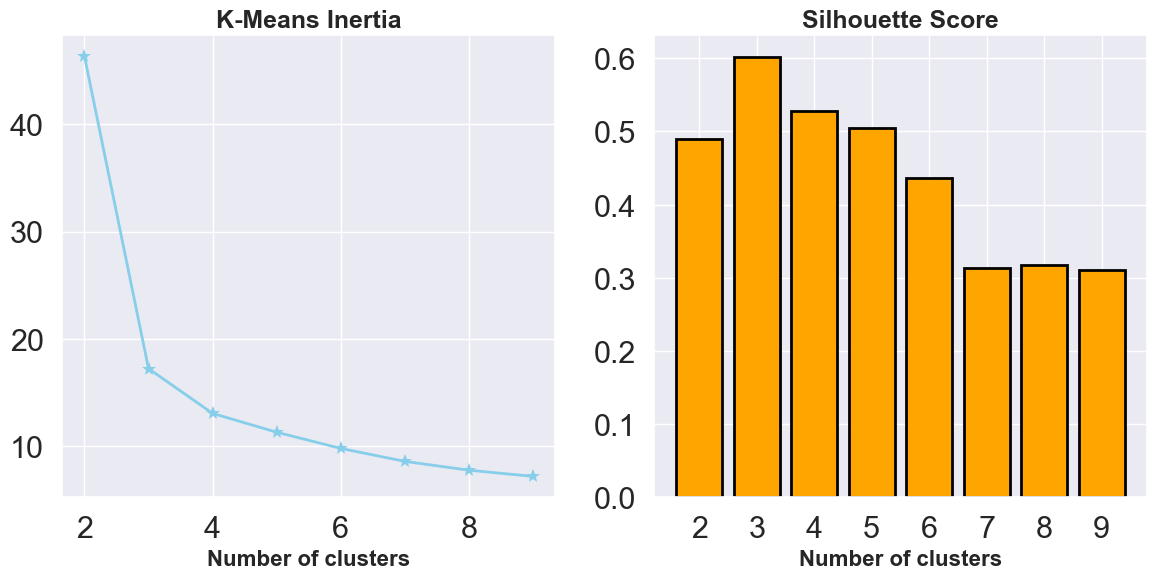

In [62]:
sns.set(style="darkgrid", rc={'figure.figsize':(14,6)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters",fontweight='bold', fontsize=16)
plt.title("K-Means Inertia", fontweight='bold', fontsize= 18)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', edgecolor="black", lw=2, color="orange" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters", fontweight='bold', fontsize=16)
plt.title("Silhouette Score", fontweight='bold', fontsize= 18)
plt.show()

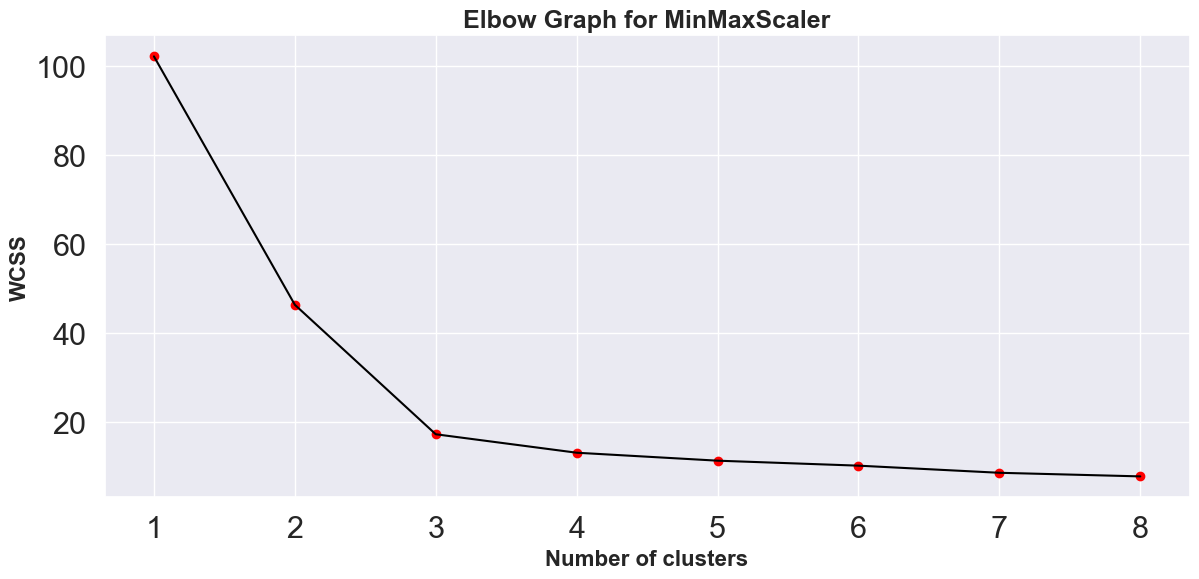

In [63]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_norm_wine)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler', fontweight='bold', fontsize=18)
plt.xlabel('Number of clusters', fontweight='bold', fontsize=16)
plt.ylabel('WCSS',fontweight='bold', fontsize=16)
plt.show()


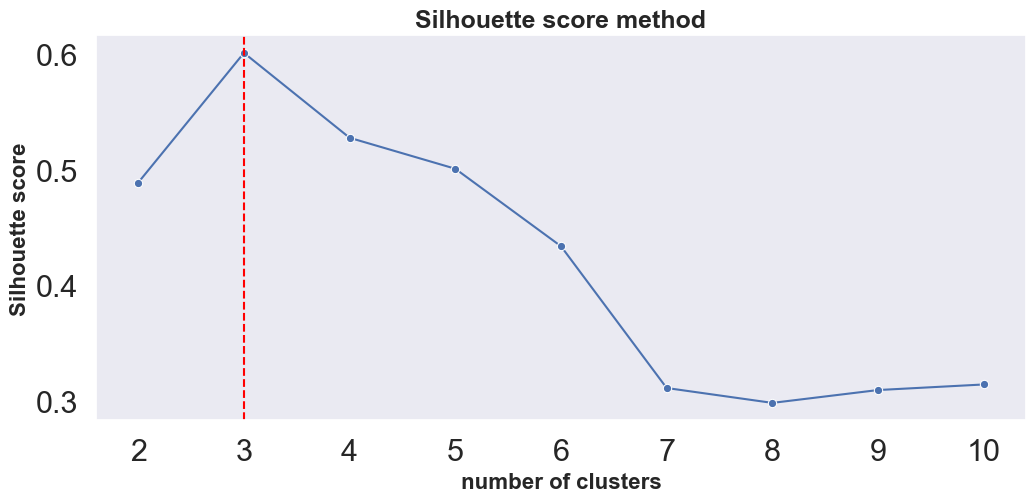

In [64]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_norm_wine)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_norm_wine, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x= n_clusters, y = s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method", fontweight='bold', fontsize=18)
ax.set_xlabel("number of clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


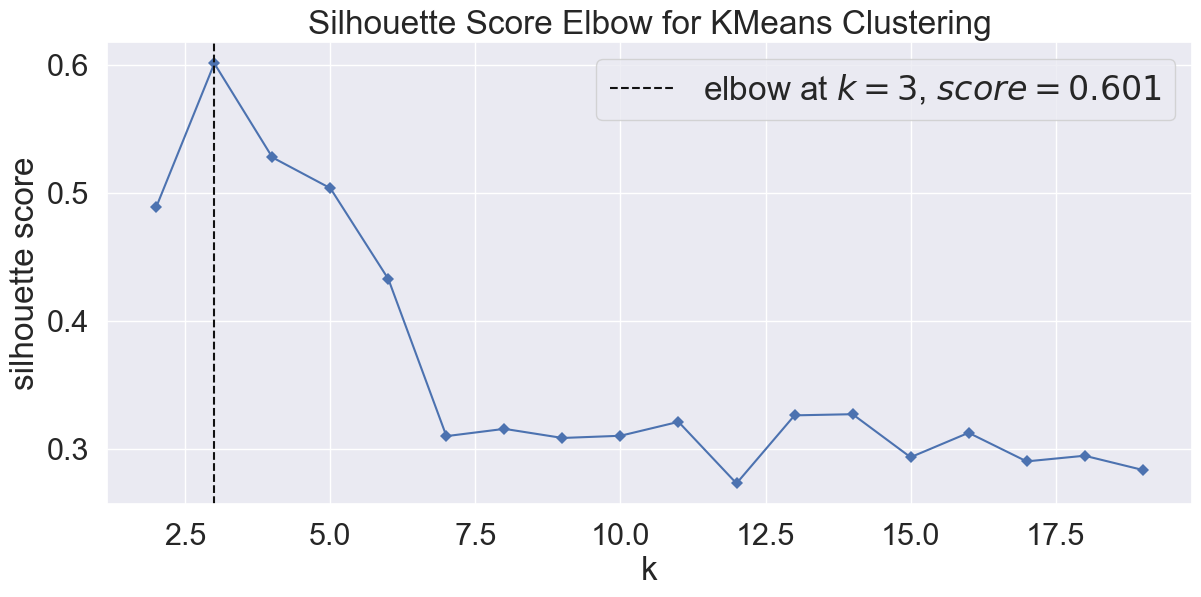

In [65]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_norm_wine)    
visualizer.show()
plt.show()

In [66]:
clust_list = [2,3,4,5,6,7,8,9]
#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_norm_wine)
    sil_score1= sil(pca_norm_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4890723054163616
For n_clusters = 3 The average silhouette_score is : 0.6012146697343207
For n_clusters = 4 The average silhouette_score is : 0.5277801183188688
For n_clusters = 5 The average silhouette_score is : 0.5022746007299653
For n_clusters = 6 The average silhouette_score is : 0.4361883489384764
For n_clusters = 7 The average silhouette_score is : 0.31371108871908276
For n_clusters = 8 The average silhouette_score is : 0.3114499614217536
For n_clusters = 9 The average silhouette_score is : 0.31580515349835864


In [67]:
# Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_norm_wine)
y_predict_kmeans.shape

(178,)

In [68]:
y_predict_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [69]:
model_kmeans.cluster_centers_


array([[ 0.88138874, -0.24778301,  0.00788805],
       [-0.75185715, -0.20328088, -0.0196517 ],
       [ 0.04006814,  0.34414911,  0.01143536]])

In [70]:
model_kmeans.inertia_


17.201397917404446

In [71]:
#Assign clusters to the data set
wine_df['Kmeans_Label'] = model_kmeans.labels_

In [72]:
# Group data by Clusters (K=3)
wine_df.groupby('Kmeans_Label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,3.000000,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
1,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333
2,2.000000,12.268571,1.936429,2.239714,20.098571,93.914286,2.244000,2.069286,0.365857,1.625571,3.082857,1.052657,2.775143,512.857143


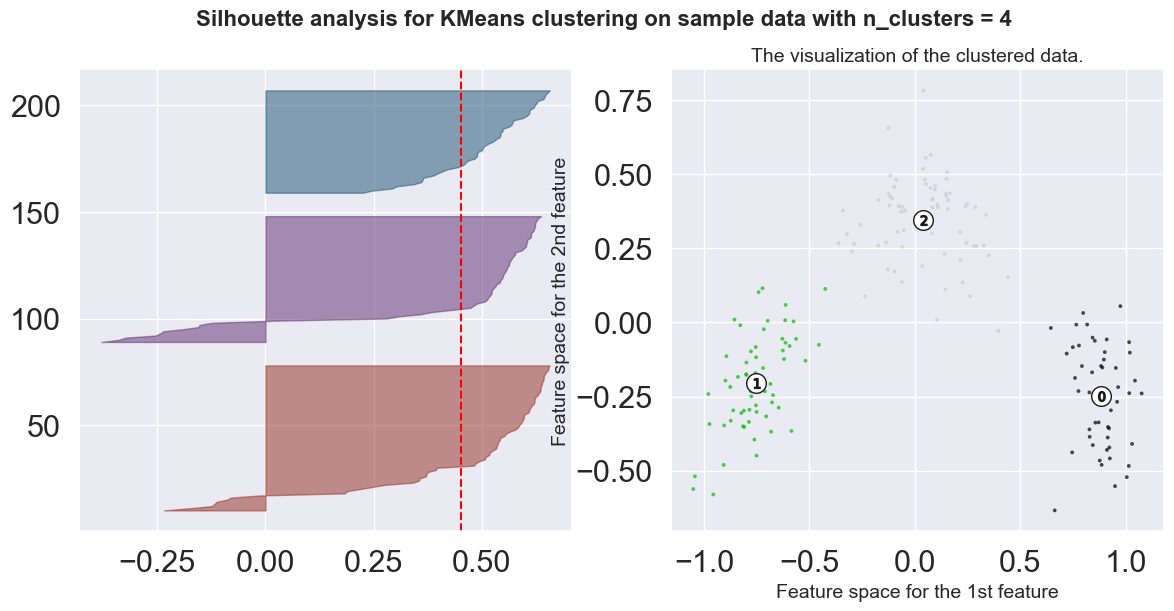

In [73]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 3 is number of clusters
ax2.scatter(pca_norm_wine.iloc[:, 0],pca_norm_wine.iloc[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=colors1,edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4), fontsize=16, fontweight='bold')
#sil_visualizer1.show()
plt.show()


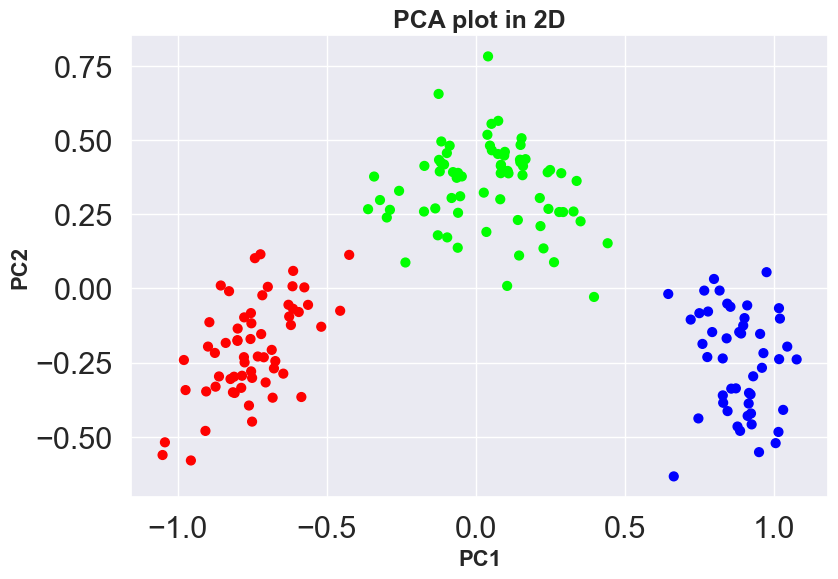

In [74]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [ ]:
# We can now clearly see the 3 number of clusters formed


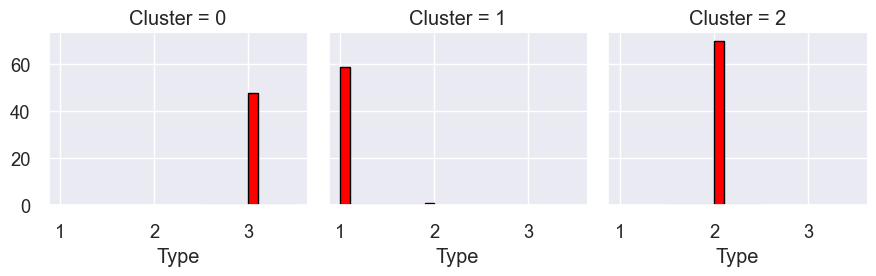

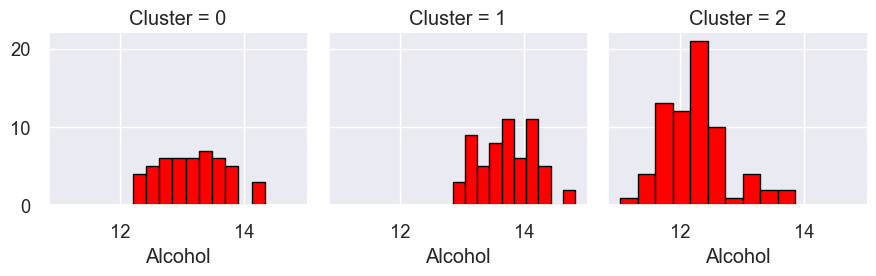

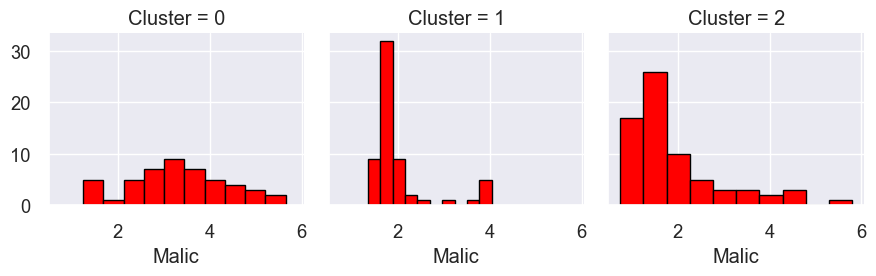

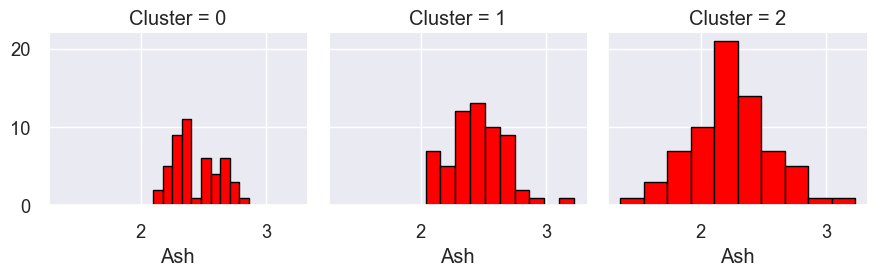

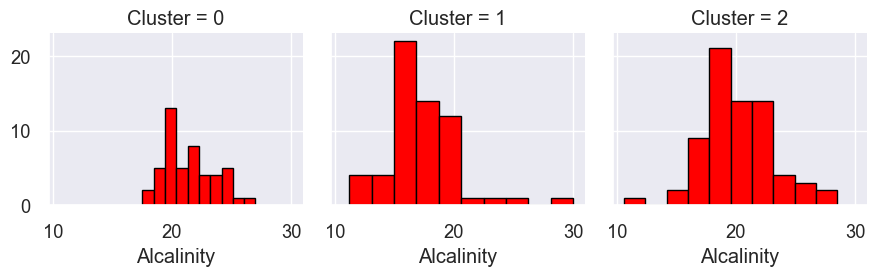

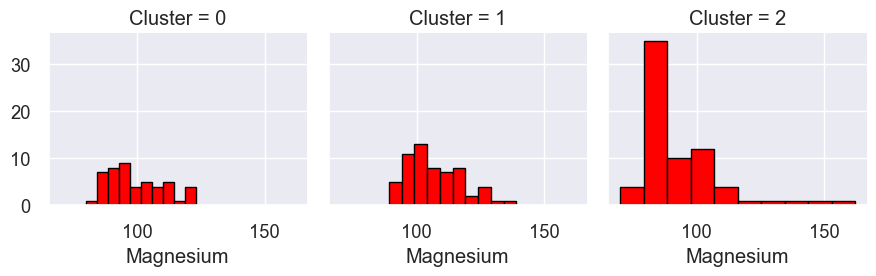

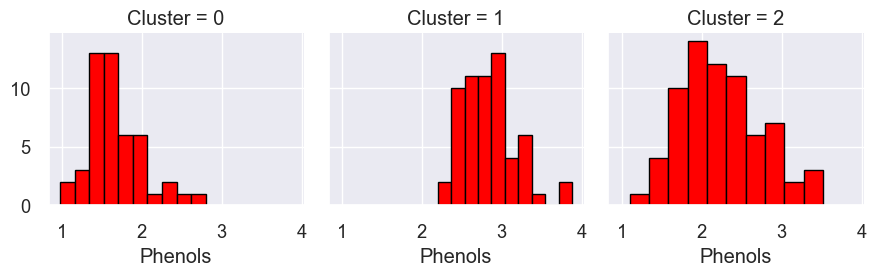

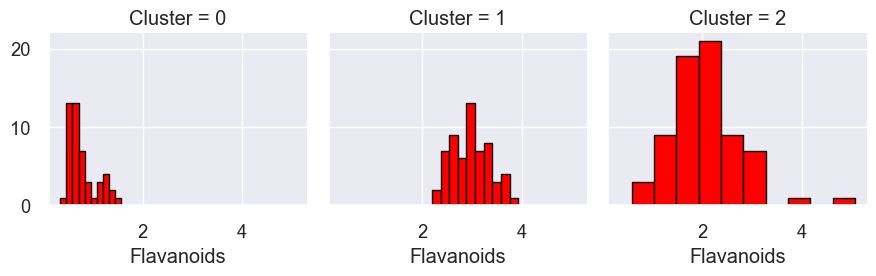

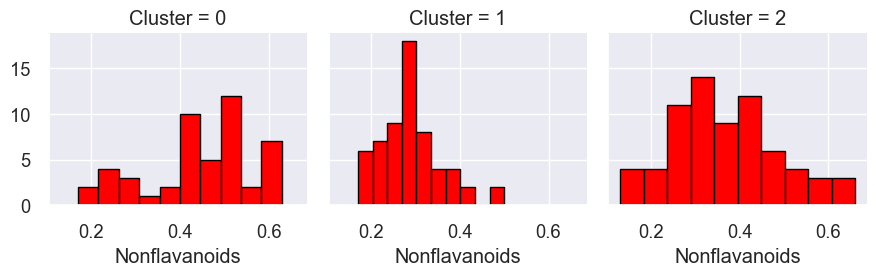

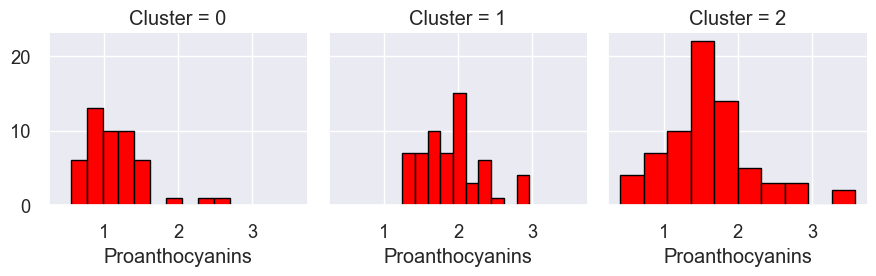

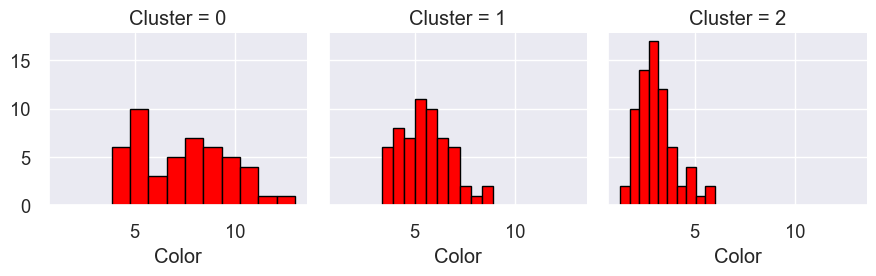

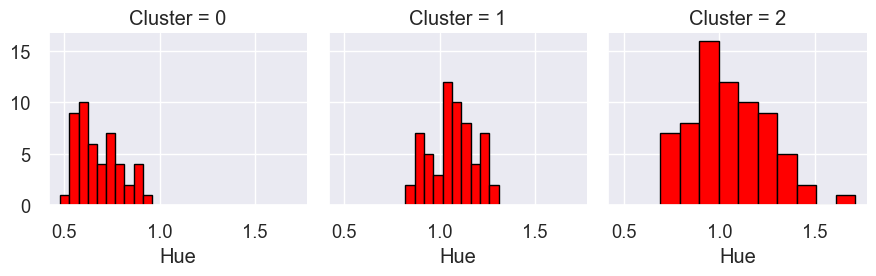

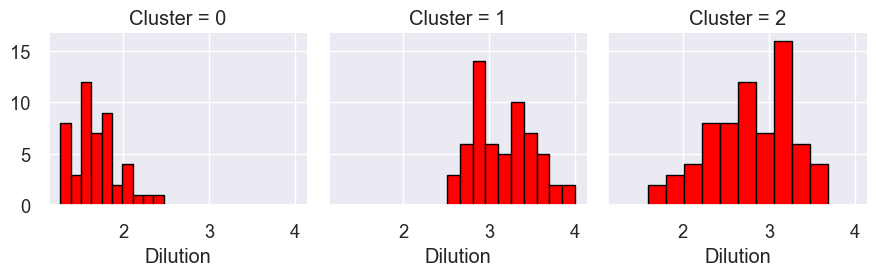

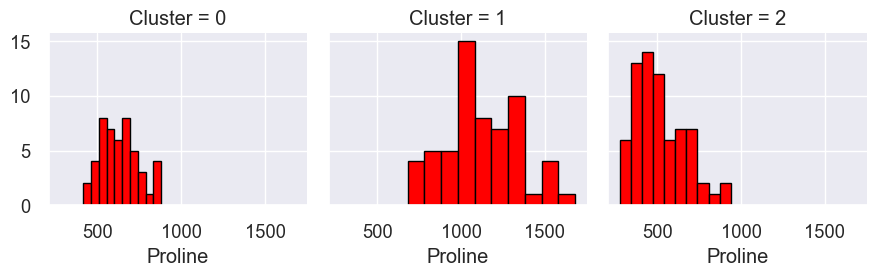

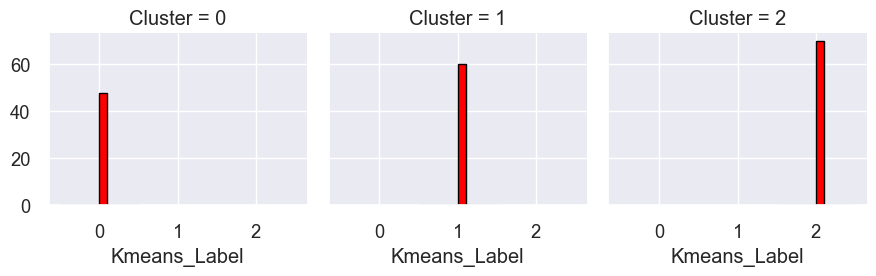

In [75]:
wine_df1 = wine_df.copy()
wine_df1['Cluster'] = model_kmeans.labels_

aux = wine_df1.columns.tolist()
aux[0:len(aux)-1]
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df1, col="Cluster")
    grid.map(plt.hist, cluster, color="red", lw=1, edgecolor="black")

In [76]:
# Sorting elements based on cluster label assigned and taking average for insights.
cluster1 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_wine = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_wine


,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Type,3.000000,1.016667,2.000000
Alcohol,13.153750,13.732167,12.268571
Malic,3.333750,2.005000,1.936429
Ash,2.437083,2.458000,2.239714
Alcalinity,21.416667,17.253333,20.098571
Magnesium,99.312500,106.883333,93.914286
Phenols,1.678750,2.847833,2.244000
Flavanoids,0.781458,2.980833,2.069286
Nonflavanoids,0.447500,0.288667,0.365857
Proanthocyanins,1.153542,1.900333,1.625571


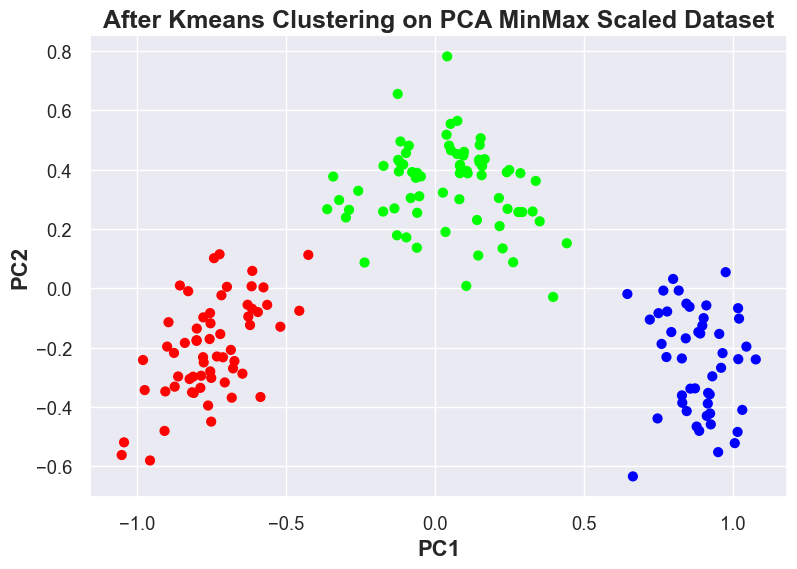

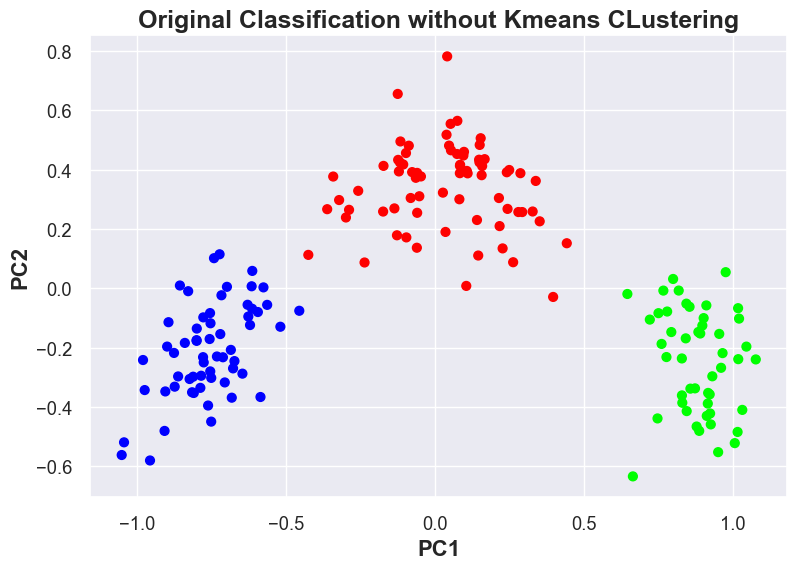

In [78]:
# Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine['Type'], cmap="brg", s=40)
plt.title('Original Classification without Kmeans CLustering',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [80]:
# Group data by Clusters (K=3)

display('After Applying PCA and Kmens CLustering on Dataset',wine_df.groupby('Kmeans_Label').agg(['mean']),'Original Classified Dataset',wine.groupby('ID').agg(['mean']))


'After Applying PCA and Kmens CLustering on Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,3.000000,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
1,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333
2,2.000000,12.268571,1.936429,2.239714,20.098571,93.914286,2.244000,2.069286,0.365857,1.625571,3.082857,1.052657,2.775143,512.857143


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
175,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


In [81]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(norm_wine)

tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE Comp. 1', 't-SNE Comp. 2'])

print(tsne_df.shape)
tsne_df.head()

(178, 2)


,t-SNE Comp. 1,t-SNE Comp. 2
0,-16.695765,5.886378
1,-14.653696,0.825409
2,-18.104366,2.479140
3,-19.881535,3.813424
4,-13.655167,2.384054


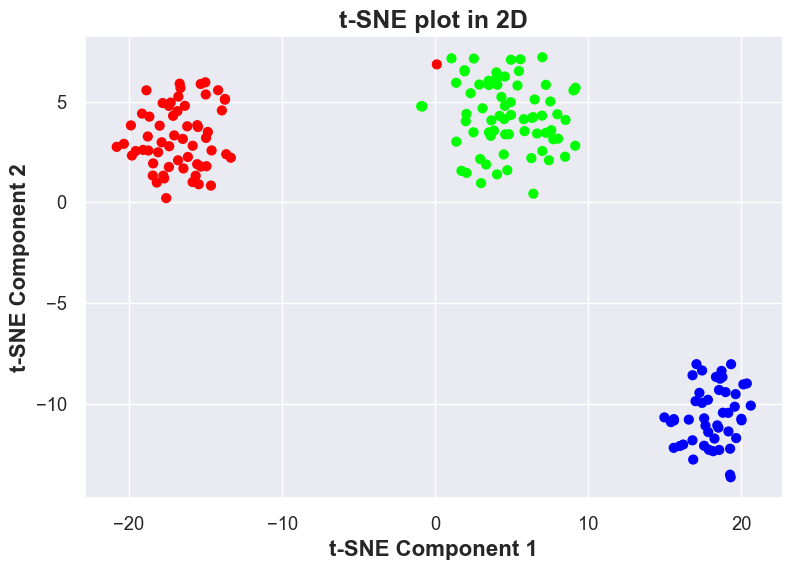

In [82]:
# t-SNE plot in 2D coloured by class

plt.figure(figsize=(9,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('t-SNE plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('t-SNE Component 1', fontweight='bold', fontsize=16)
plt.ylabel('t-SNE Component 2', fontweight='bold', fontsize=16)
plt.show()

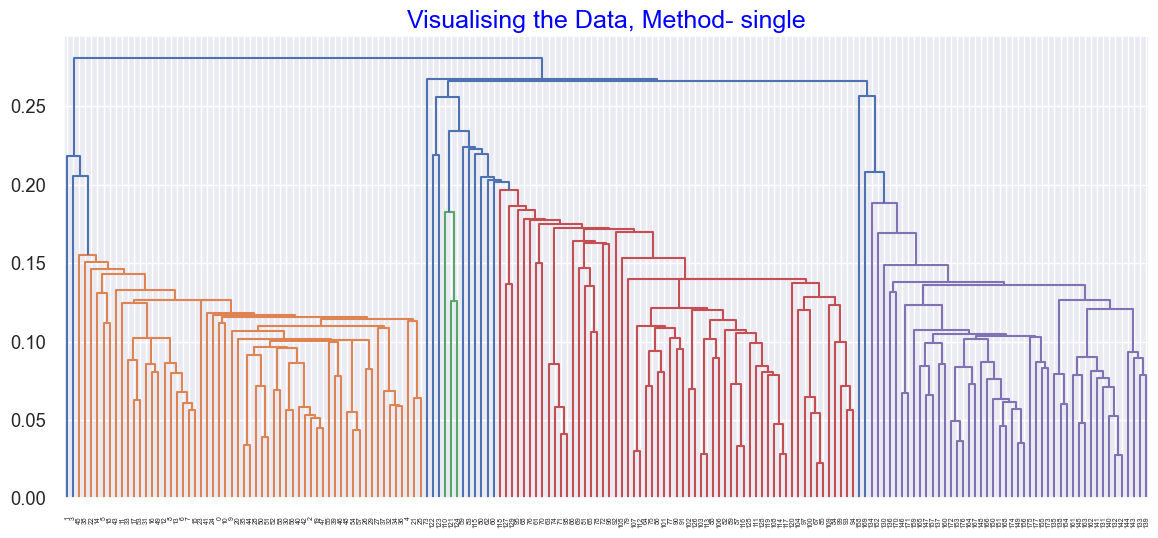

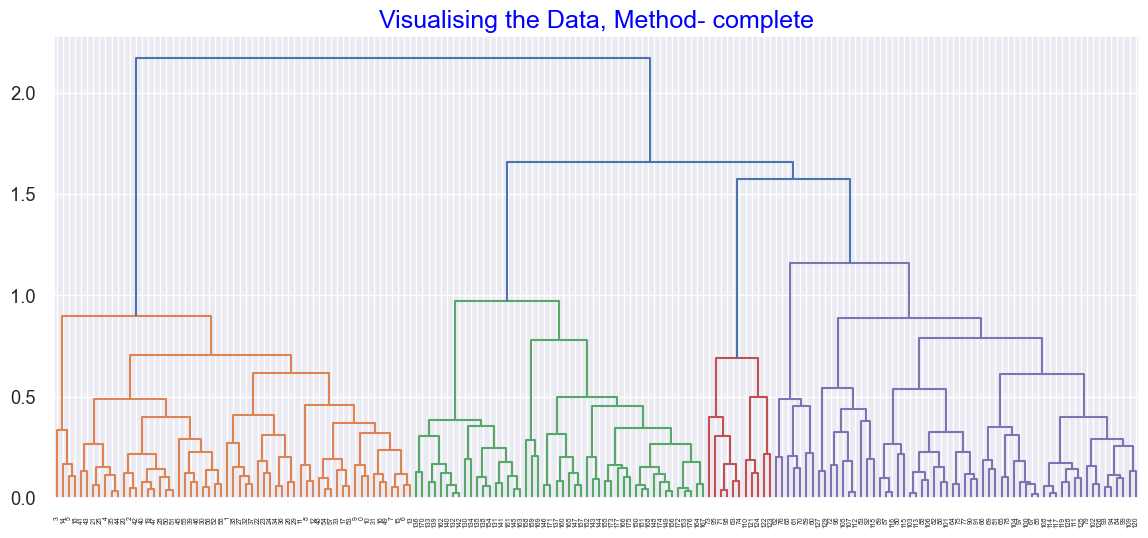

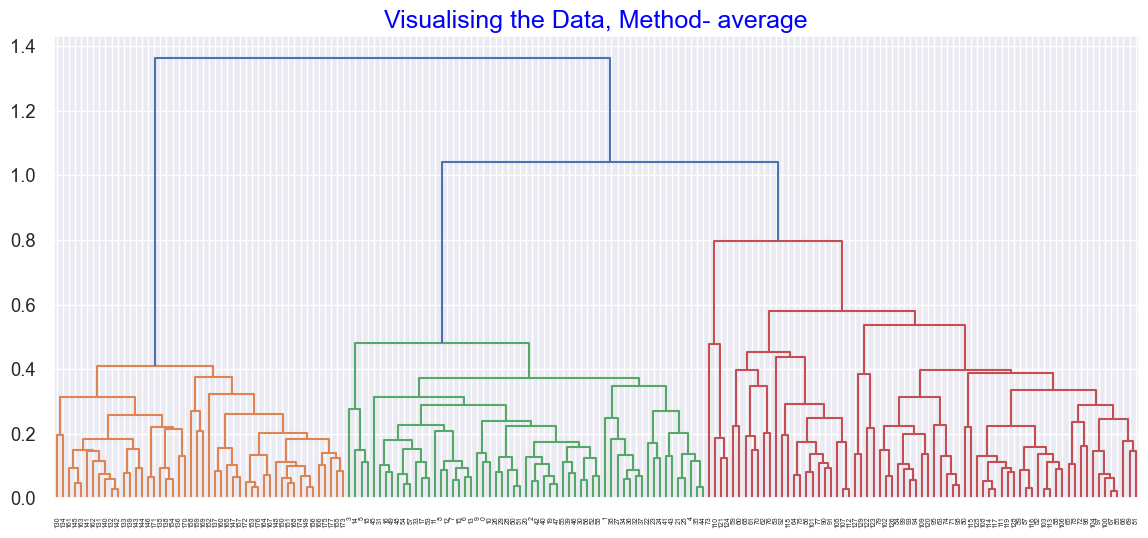

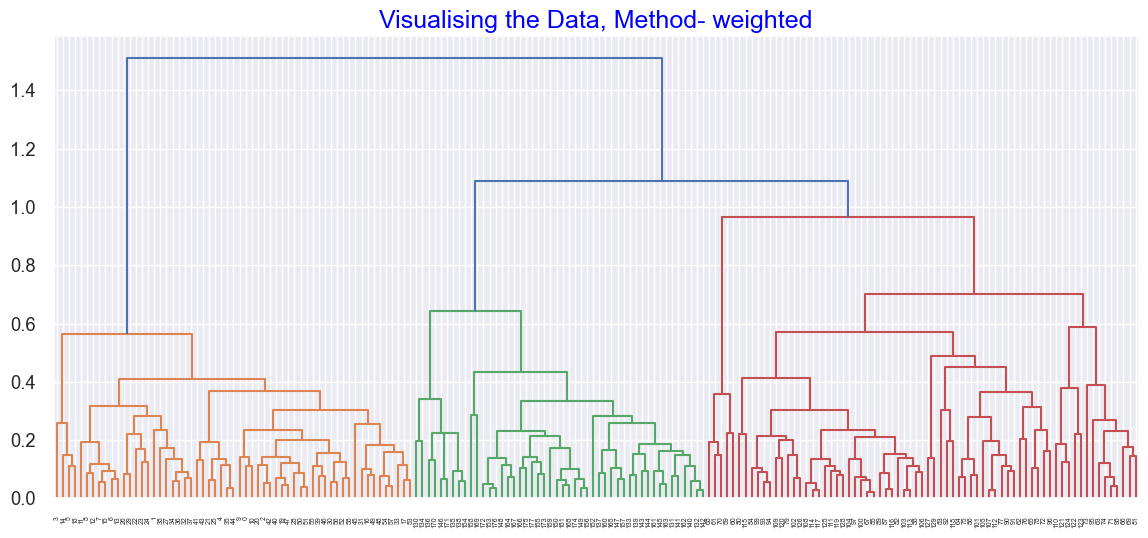

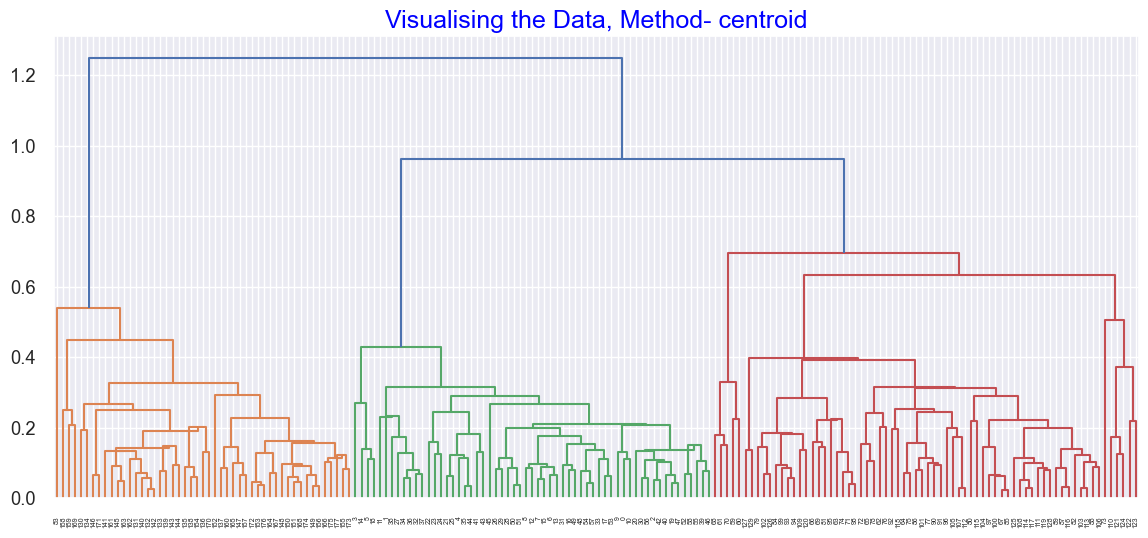

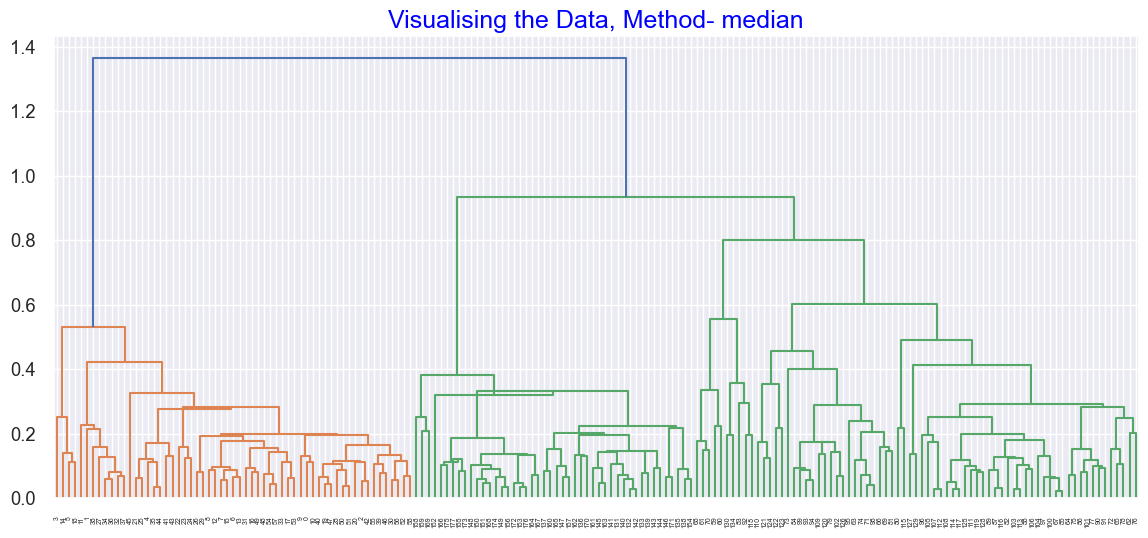

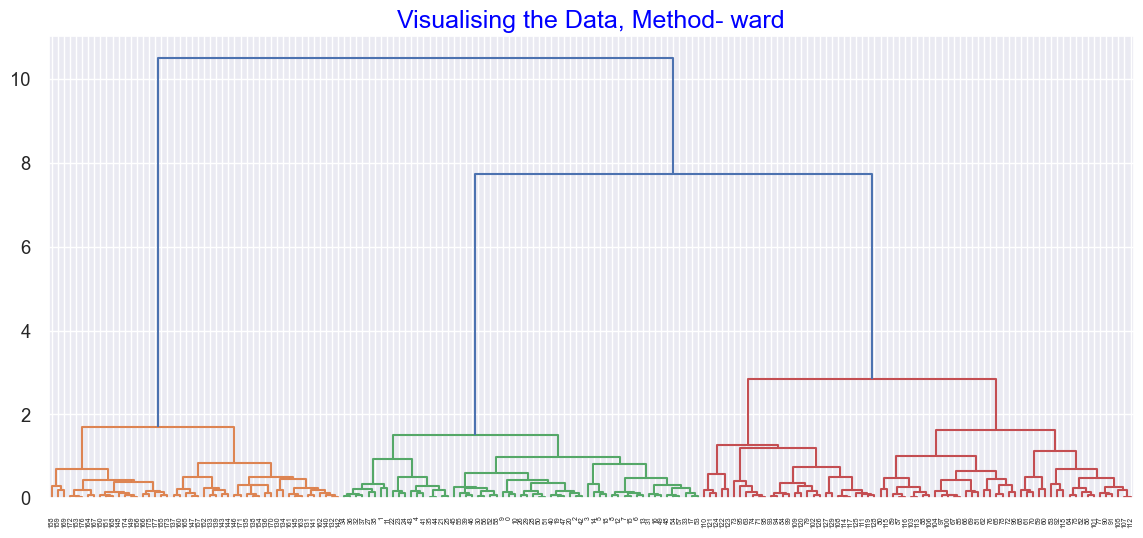

In [83]:
# Hierarchical Clustering Algorithm
#Dendogram on PCA MinMaxScaler Applied Dataset

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6)) 
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_norm_wine, method = methods,optimal_ordering=False))

In [84]:
# Silhouette Score method for PCA MinMax Scaled Data
#Applying Different Linkages using Euclidean Method for distance Calculation

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
        silhouette_score1 = sil(pca_norm_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5155737566343555
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.494219004087305
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5155737566343555
For n_clusters = 2 The average silhouette_score with linkage- single : 0.494219004087305

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6015492770984977
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.6015492770984977
For n_clusters = 3 The average silhouette_score with linkage- average : 0.6015492770984977
For n_clusters = 3 The average silhouette_score with linkage- single : 0.28989847165360033

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.5274120201848939
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5251633534382514
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5528160807000241
For n_

In [85]:
# Applying Different Linkages using Different Distance Methods

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
            silhouette_score1 = sil(pca_norm_wine, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.494219004087305
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4957565446894257
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.494219004087305
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.4957565446894257
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.48327755332282174

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.5155737566343555
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.5157830689922069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.5155737566343555
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.51578306

In [ ]:
# The seperation in each Linkages and Distance Methods indicate that 3 is the optimal number for clusters.
For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- l2 : 0.6015
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6015

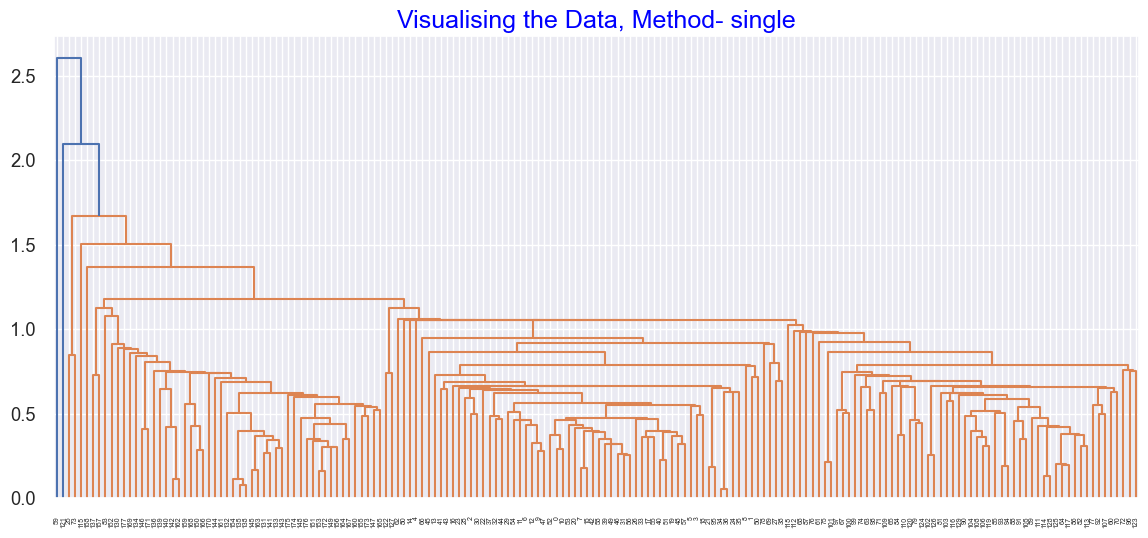

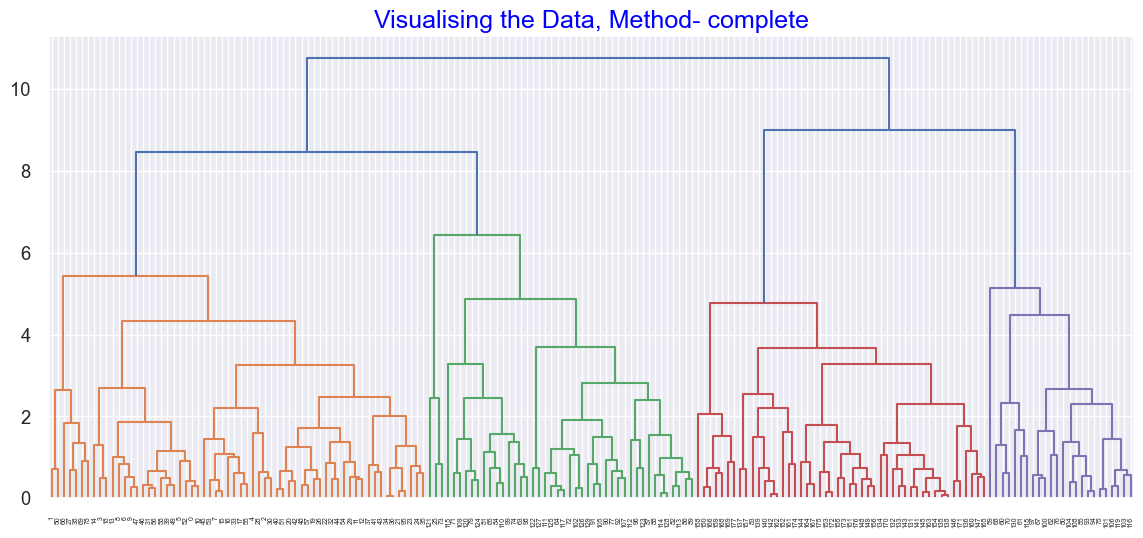

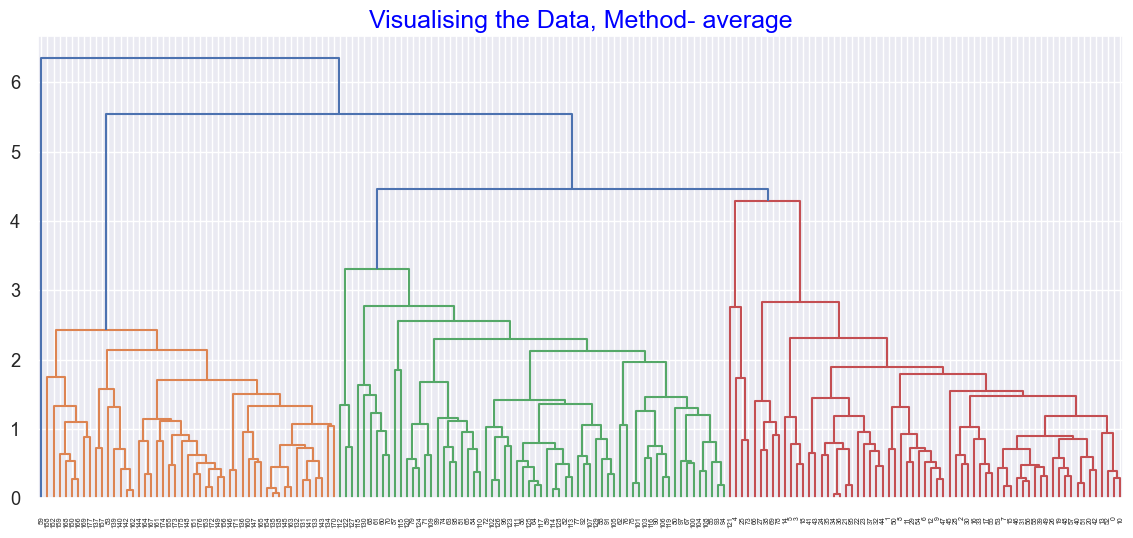

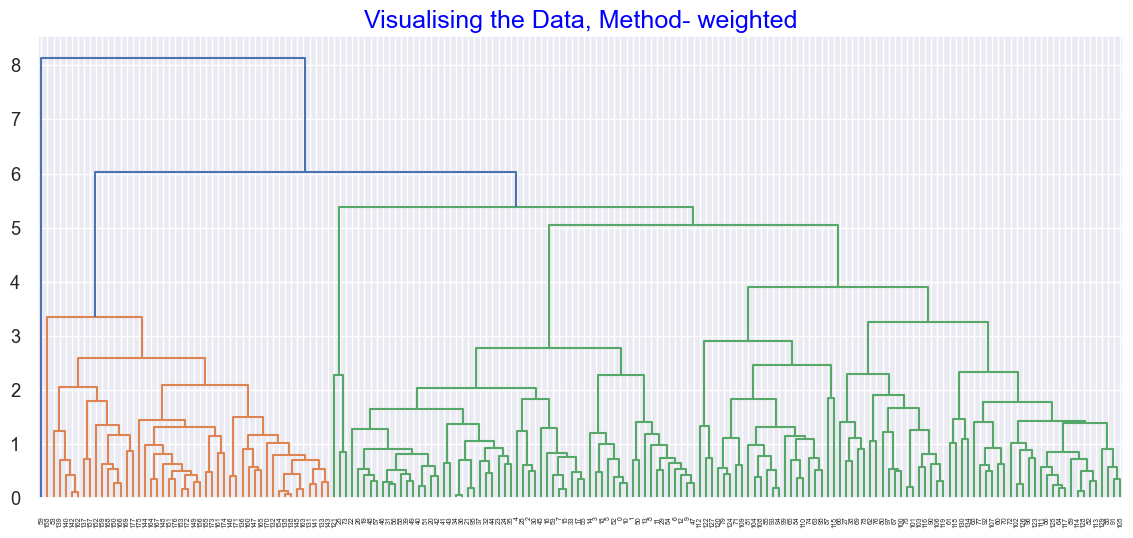

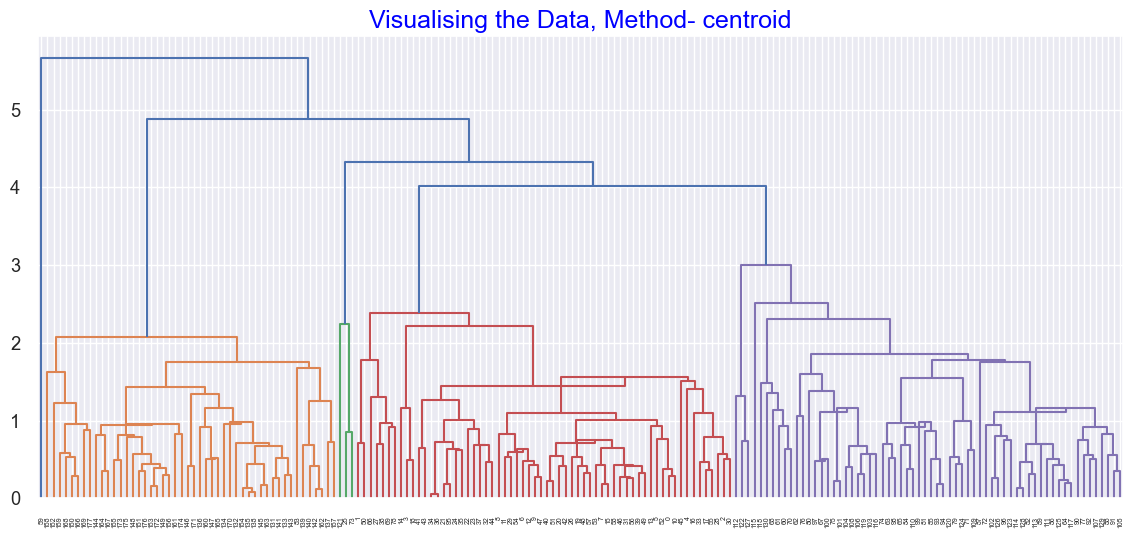

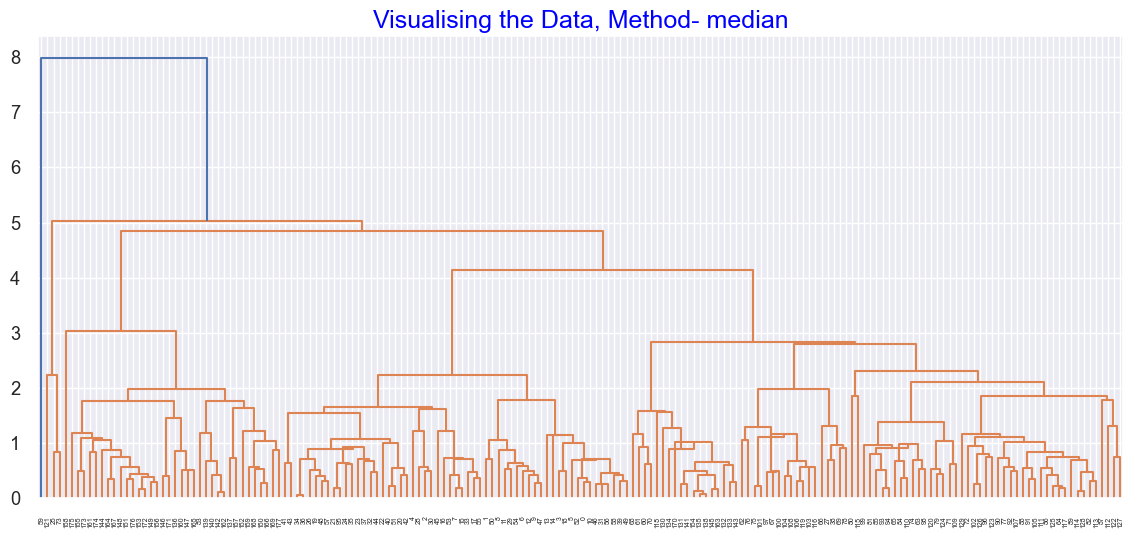

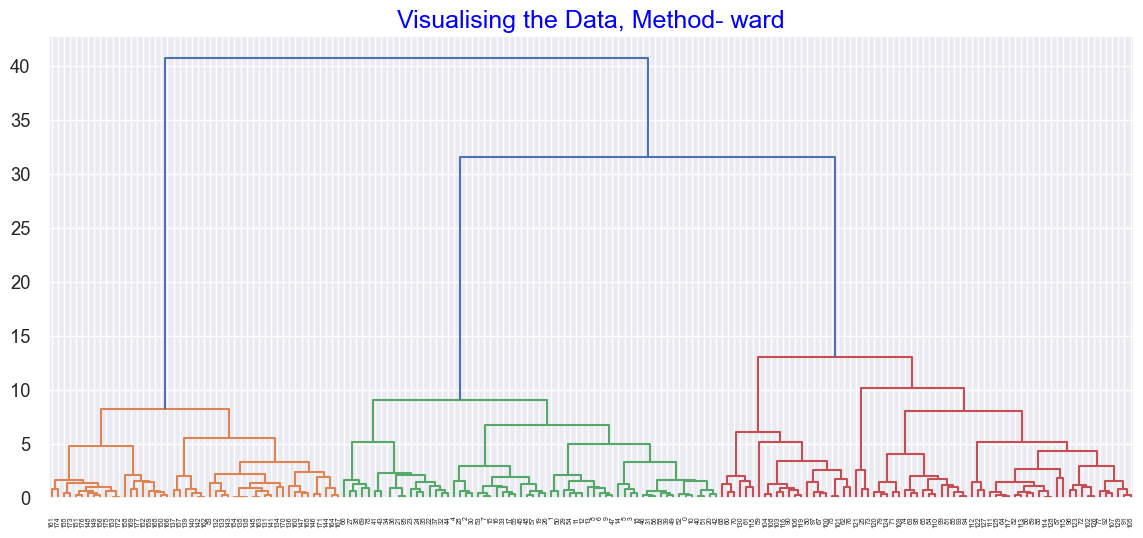

In [86]:
# Dendrogram on Standard Scaler Applied on Data

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))  
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'} 
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_wine, method = methods,optimal_ordering=False))

In [87]:
# Silhouette Score method for PCA Standard Scaled Data
#Applying Different Linkages using Euclidean Method for distance Calculation

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_wine)
        silhouette_score1 = sil(pca_std_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-", linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4472178137923963
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.34290670682384555
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3294922756457695
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3294922756457695

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5006444501191472
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3018182449367176
For n_clusters = 3 The average silhouette_score with linkage- average : 0.42185702229604777
For n_clusters = 3 The average silhouette_score with linkage- single : 0.23707739937331093

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4371707740940233
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4334966057914045
For n_clusters = 4 The average silhouette_score with linkage- average : 0.49390301344215337
F

In [88]:
#Applying Different Linkages using Different Distance Methods

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages)
            hie_labels2 = hie_cluster2.fit_predict(pca_std_wine)
            silhouette_score2 = sil(pca_std_wine, hie_labels2)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score2)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.34290670682384555
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.23682517254779412
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.34290670682384555
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.23682517254779412
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.45043121053288926

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.3294922756457695
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.3294922756457695
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.3294922756457695
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.32

In [ ]:
#  Max score is with cluster numbers 4 in standard scaler transformation transformation.
For n_clusters = 4 The average silhouette_score with linkage- complete and Affinity- l1 : 0.0739

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5006

In [89]:
# Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [90]:
agg_clustering.n_clusters_


4

In [91]:
(sil(pca_std_wine, agg_clustering.labels_)*100).round(3)


50.469

In [92]:
# Putting Cluster lables into original dataset And analysis of the same

wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1


In [93]:
wine_df.groupby('Hierarchical_Labels').agg(['mean'])


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.014706,12.272353,1.945882,2.234853,20.035294,93.191176,2.204853,1.993676,0.364265,1.577941,3.029412,1.047588,2.736029,509.205882,1.970588
1,1.033333,13.724500,1.985167,2.426000,16.903333,106.500000,2.840333,2.978833,0.287000,1.928333,5.508167,1.063500,3.148667,1107.266667,1.033333
2,3.000000,13.160000,3.375957,2.439574,21.489362,98.829787,1.682340,0.771489,0.452553,1.158085,7.466383,0.681064,1.691915,629.893617,0.000000
3,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,1.333333


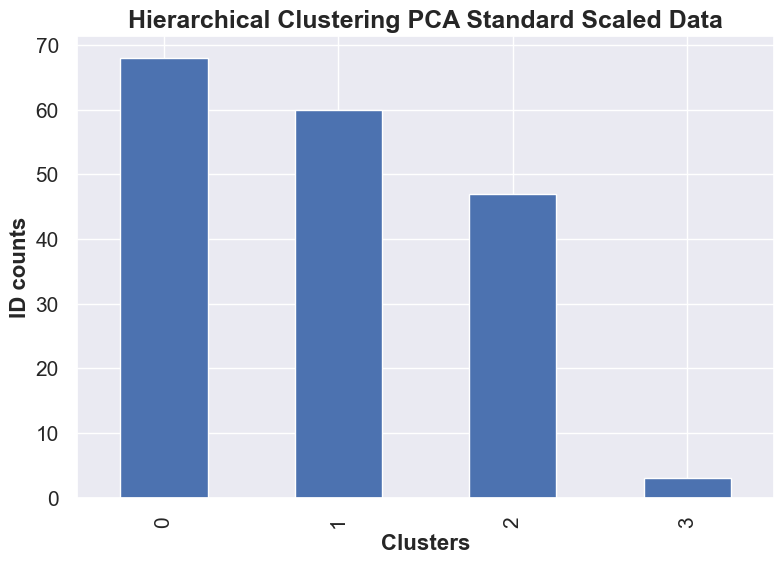

In [94]:
#Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(9,6))
wine_df.groupby(['Hierarchical_Labels']).count()['Type'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize= 18,fontweight='bold')
ax.set_xlabel('Clusters', fontweight='bold', fontsize=16)
ax.set_ylabel('ID counts', fontweight='bold', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

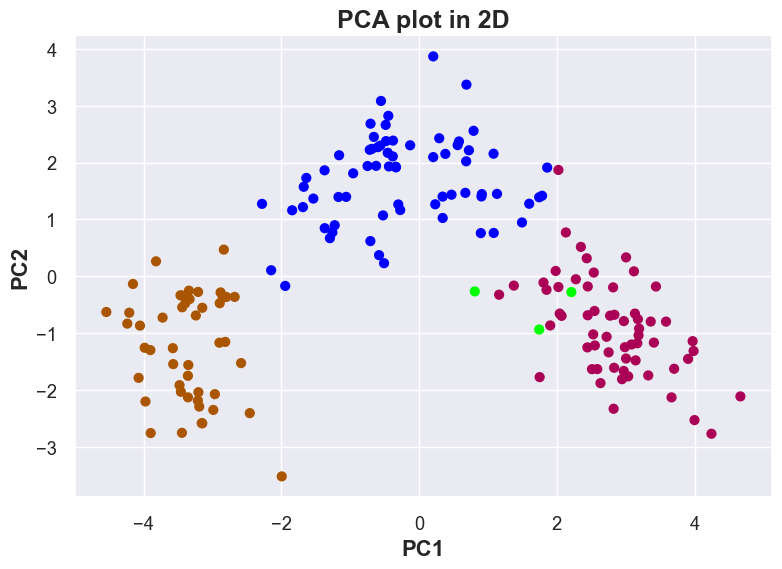

In [95]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

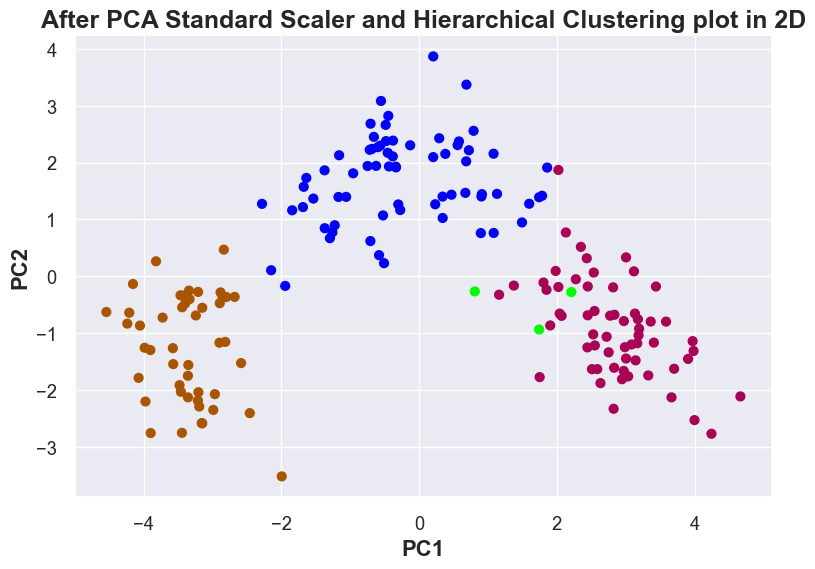

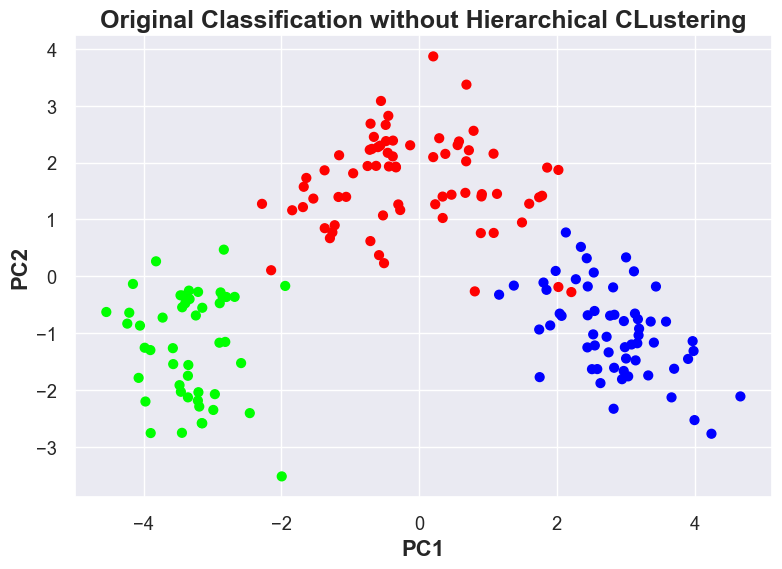

In [96]:
# Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

In [98]:
# Group data by Clusters (Clusters=4)

display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',wine_df.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',wine.groupby('ID').agg(['mean']).head())


'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.014706,12.272353,1.945882,2.234853,20.035294,93.191176,2.204853,1.993676,0.364265,1.577941,3.029412,1.047588,2.736029,509.205882,1.970588
1,1.033333,13.724500,1.985167,2.426000,16.903333,106.500000,2.840333,2.978833,0.287000,1.928333,5.508167,1.063500,3.148667,1107.266667,1.033333
2,3.000000,13.160000,3.375957,2.439574,21.489362,98.829787,1.682340,0.771489,0.452553,1.158085,7.466383,0.681064,1.691915,629.893617,0.000000
3,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,1.333333


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [99]:
# Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_norm_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [100]:
agg_clustering.n_clusters_


3

In [101]:
(sil(pca_norm_wine, agg_clustering.labels_)*100).round(3)


60.155

In [102]:
# Putting Cluster lables into original dataset And analysis of the same

wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


In [103]:
wine_df.groupby('Hierarchical_Labels').agg(['mean'])


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.985915
1,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000
2,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.000000


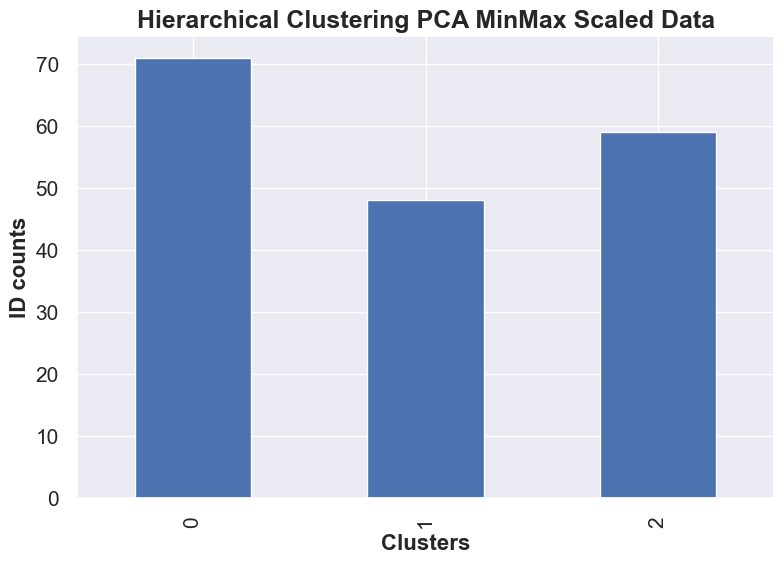

In [104]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(9, 6))
wine_df.groupby(['Hierarchical_Labels']).count()['Type'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data', fontweight='bold', fontsize=18)
ax.set_xlabel('Clusters', fontweight='bold', fontsize=16)
ax.set_ylabel('ID counts', fontweight='bold', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

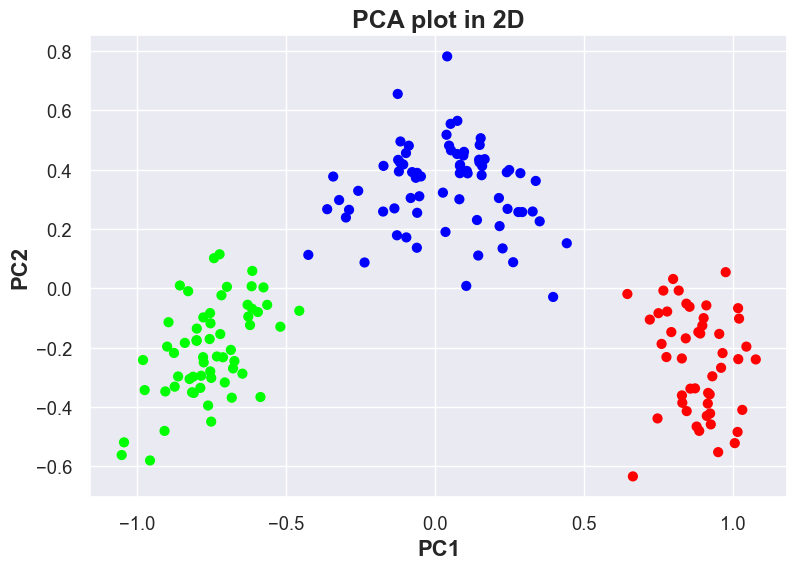

In [105]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

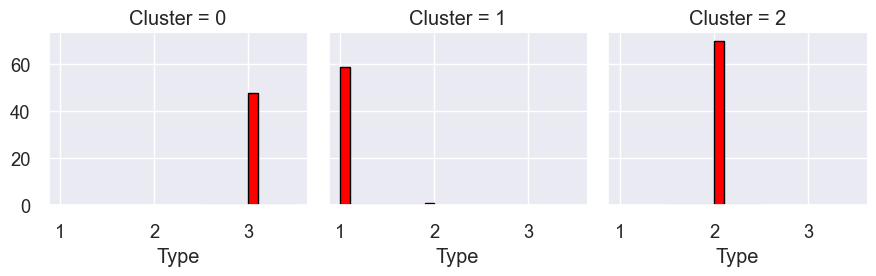

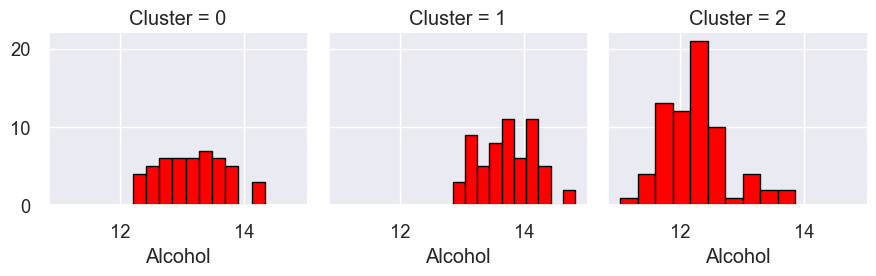

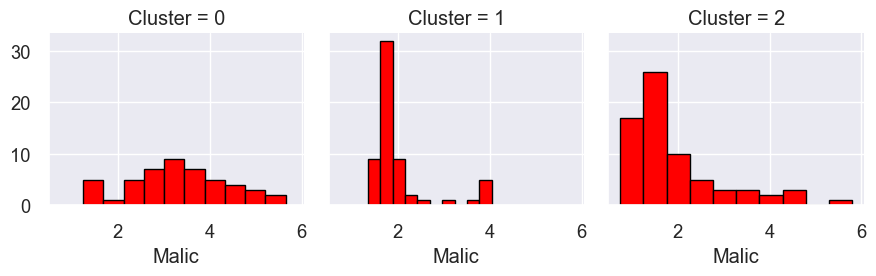

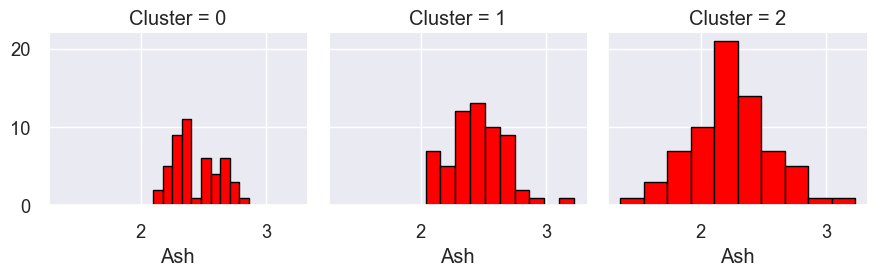

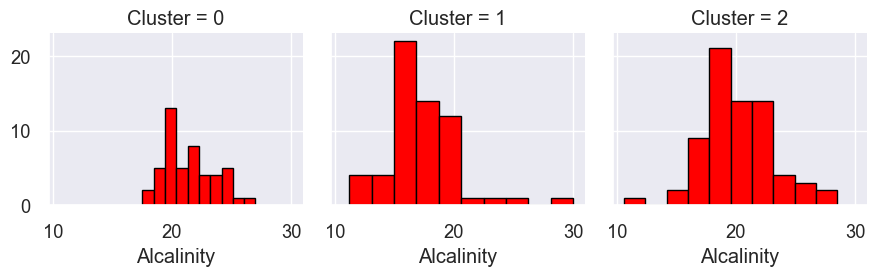

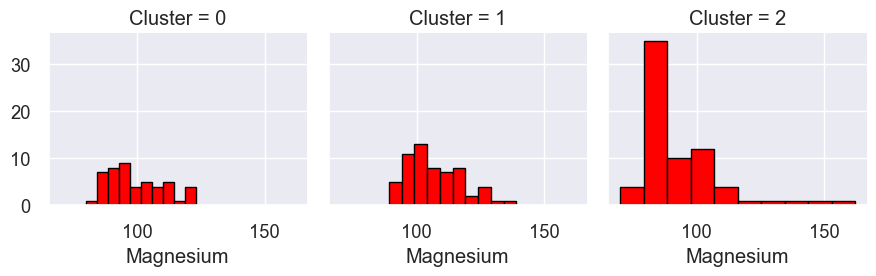

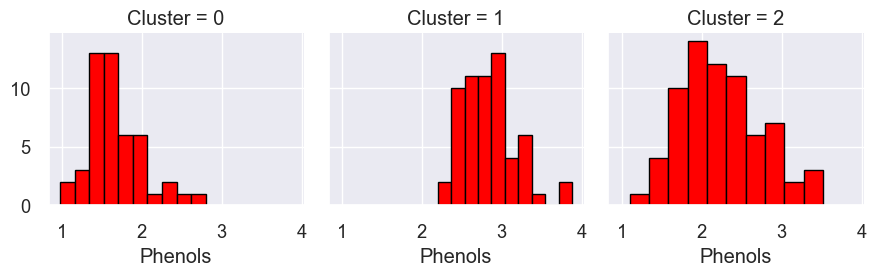

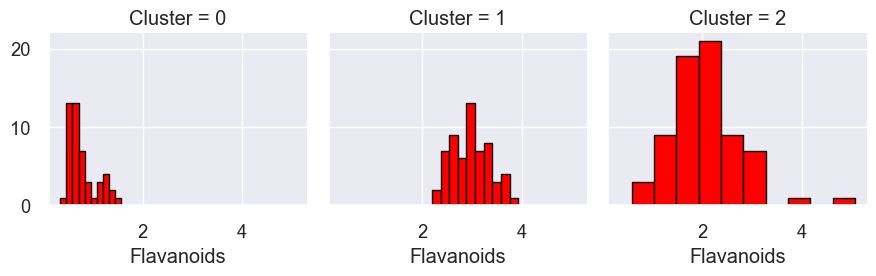

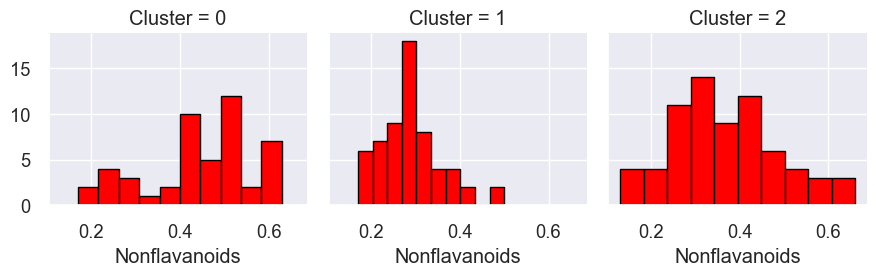

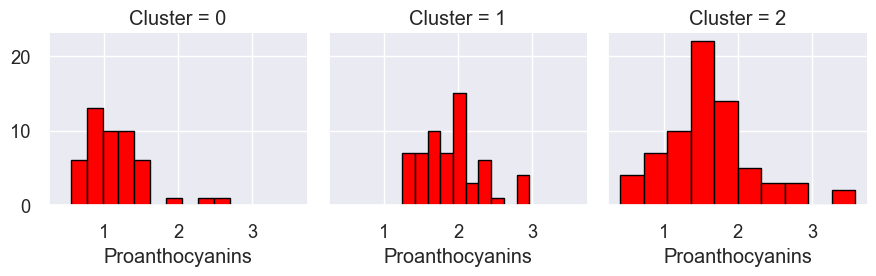

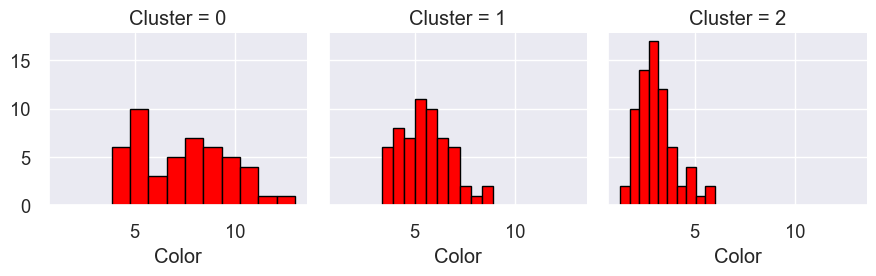

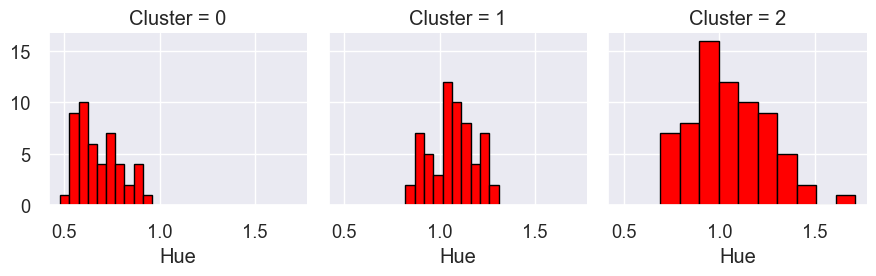

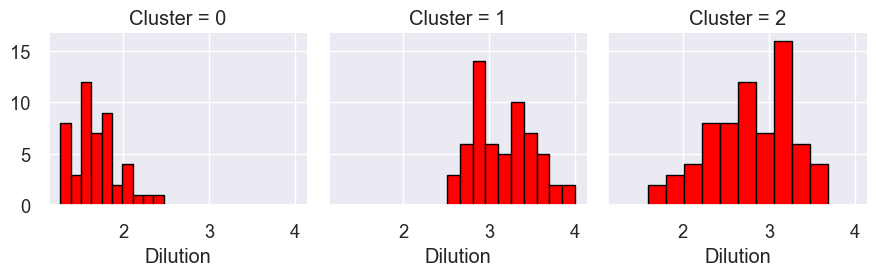

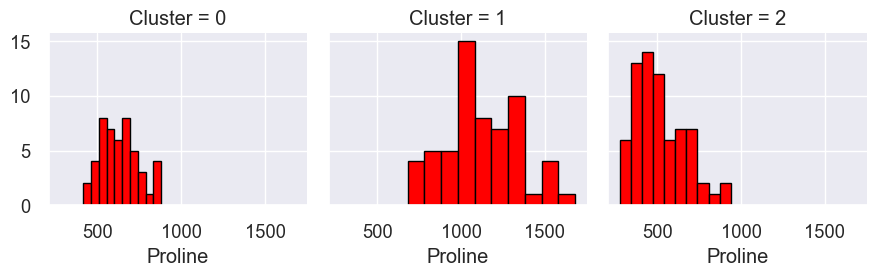

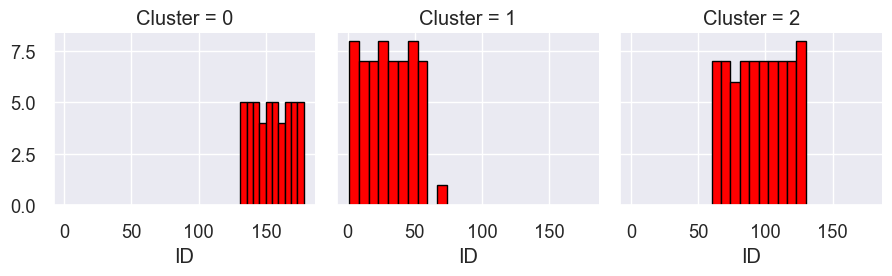

In [106]:
# We can now clearly see the 3 number of clusters formed

wine_df2 = wine.copy()
wine_df2['Cluster'] = model_kmeans.labels_

aux = wine_df2.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)
for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df2, col= 'Cluster')
    grid.map(plt.hist, cluster, color="red", lw=1, edgecolor="black")

In [107]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df2.loc[wine_df2.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Type,3.000000,1.016667,2.000000
Alcohol,13.153750,13.732167,12.268571
Malic,3.333750,2.005000,1.936429
Ash,2.437083,2.458000,2.239714
Alcalinity,21.416667,17.253333,20.098571
Magnesium,99.312500,106.883333,93.914286
Phenols,1.678750,2.847833,2.244000
Flavanoids,0.781458,2.980833,2.069286
Nonflavanoids,0.447500,0.288667,0.365857
Proanthocyanins,1.153542,1.900333,1.625571


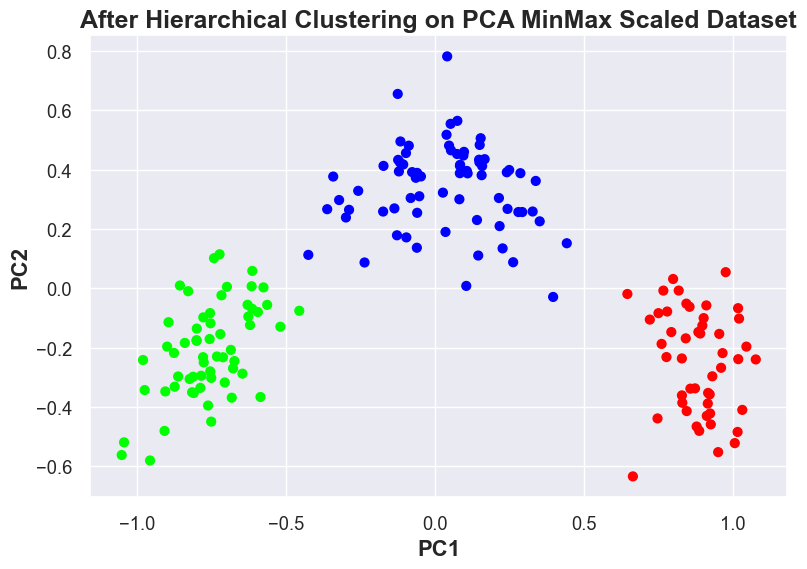

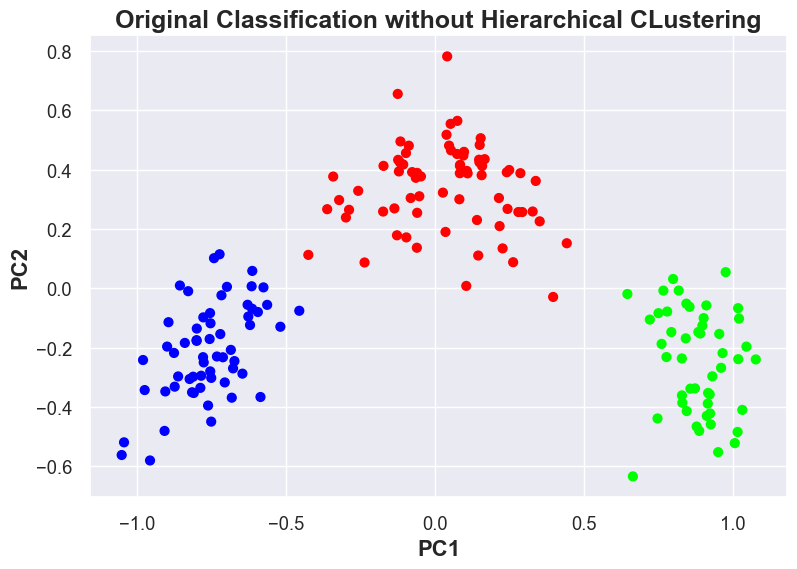

In [108]:
# Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [109]:
# Group data by Clusters (K=3)
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',wine_df.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',wine.groupby('ID').agg(['mean']).head())


'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.985915
1,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000
2,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.000000


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature
We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column